# Project Name :- House Price Prediction

Created by :- Atul Mishra
Start Date :- 12/08/2024

End Date :- 20/08/2024

Batch ID :- PTID-CDS-AUG-24-2023

Dataset Link :- https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1020-HousePricePred.zip

Project ID :- PRCP-1020-HousePricePred


### Project Analysis Summary: Unveiling Insights and Model Performance

In this project, we followed a systematic approach to extract valuable insights and enhance our model’s predictive power. Here’s a breakdown of our journey:

* Exploratory Data Analysis (EDA): We delved into both categorical and numerical columns, uncovering patterns, distributions, and potential outliers. EDA laid the groundwork for understanding our dataset.

* Feature Exploration: Armed with domain knowledge, we explored two distinct features. These features were carefully chosen based on their relevance to our project goals. The insights gained here informed subsequent steps.

* Logical Feature Analysis: We scrutinized the relationship between features and our target variable. By doing so, we identified correlations and dependencies that could drive meaningful decisions.

* Feature Engineering: Creativity came into play as we engineered new features. These additions aimed to capture hidden nuances within the data, ultimately improving model performance.

* Data Preprocessing and Model Training: After thorough data cleaning and preprocessing, we trained our model. The Bagging Model Tuning yielded an impressive R2 score of 87%, indicating robust predictive capability.

Our journey from data exploration to model refinement has equipped us with actionable insights. Now, armed with this knowledge, we’re ready to make informed decisions and drive impactful outcomes.

Feel free to share more details about your project—I’d love to hear more! 🚀😊

# 1. Importing Libraries

In [ ]:
!pip install summarytools

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from summarytools import dfSummary

# 1.1 Importing Dataset

In [ ]:
data= pd.read_csv("/content/data.csv")

# 2. Basic Checks

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
data.shape

(1460, 81)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [ ]:
dfSummary(data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Id[int64],Mean (sd) : 730.5 (421.6)min < med < max:1.0 < 730.5 < 1460.0IQR (CV) : 729.5 (1.7),"1,460 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABxklEQVR4nO3XQU7CYBBA4fkbJSCkDSHCAbwBSw7hYT0EJ2DhxhU7EtKUUDEarCcAKTXqS963baczixcSUtM0If132V8fIF3i5rsXUkqDiOhd+f0sIj6vnO06T91Nvbvr/HvTNIdTD8+GmlIaTCaTxzzPx223Ho/H27quH0aj0UuWZR+/OU/dTb37J+Z3u12ZUno6Fet3v6i9PM/Hi8XiUBTFW5vF6/V6vFqt7ufz+fNsNivbzHadp+6m3t11vqqq/nK5HG+3215EXBVqREQURfE2nU5f2ywvy3IQETEcDlvPdp2n7qbe/RPzETE499A/U0IwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEK4eaSl6qq6rf98H6/70dE1HXd32w2d785T91Nvbvr/CV9fQGSljnmc7n3zQAAAABJRU5ErkJggg=="">",0(0.0%)
2,MSSubClass[int64],Mean (sd) : 56.9 (42.3)min < med < max:20.0 < 50.0 < 190.0IQR (CV) : 50.0 (1.3),15 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACjUlEQVR4nO3cT27aQBiG8W8KRAYkI4QEOy5QqQuWHKKH7RG64ATcgB0SQka4sTBjd9EmitSIPzO44SXPb40NUR7FHxN7XF3XBty7Lx/9AYBLtM+9wDnXNbOnwPMf6rp+DjwWeHUyVOdcdzQafU/TdBhy8t1ut3XO/SBWxDr3F/UpTdPhfD5/HgwGxTUnzrIsWSwWw81m82RmhIooZy/9ZmaDwaAYj8e/As7fDTgG+AdfpiCBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCGBUCHhouf6PwrbCeHF3YbKdkJ4625DNbYTwhv3HKqZsZ0Q/uDLFCQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQQKiQ0+iiK975jZqlzLuTwtKqqzo0/EkQ1Fmqe552yLL9Np9NWq9W66uE8M7OyLBPv/deiKH6aWcgzU3ggjYV6OBzaSZL0ZrNZMZlMttcev1qthsvlsnc8HltNfD5oafwp1H6/H/QU6Xa75SlSvOLLFCQQKiQQKiQQKiTc/ZY+oSLXcM0idgNkF8Lbe8hQY9dwzcJ3A2QXwmY8ZKixa7iRuwGyC2EDHjLUF6FruH9FreMq7kIYObKYNTi2PHSoMSJmXMl7FGJHFrNmxxZCfUfMjCt8j0LwyGLW/NhCqO+ImXHV71GIGFnMe59a+ErLybGBUE8ImXE/6z0KsSst58YGQsVNxFyFLhkbCBU3FbHScvJKdFGoWZYl177rfr9PzMzyPE/W63Xvfx6v+t5ZliXe+7bF/UctVFpVVTvkd20W/3Ofe81vdEBkRNmCS4sAAAAASUVORK5CYII="">",0(0.0%)
3,MSZoning[object],1. RL2. RM3. FV4. RH5. C (all),"1,151 (78.8%)218 (14.9%)65 (4.5%)16 (1.1%)10 (0.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABzCAYAAACPdnBjAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACYklEQVR4nO3dwW3iUBiF0R+EMsPGCCFRBgVQRIqdIiiAPhDCiyGTDbOYJJpNkg3vPis5p4In5ZMdW75idrvdChLmvQ/A9yE2YsRGzKyqllX10PsgNPd8u92uPQ+w2Gw2j8MwrHsegvbGcTzPZrNfPYNbDMOw3u/319Vq9dTrELR1uVx+Hg6H9el0eqiqfrFVVa1Wq6ftdvu71yGIWPY+gAcEYsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNmUfXvE5TeB6Gdqfx9F+M4ng+Hw7om8AkK7YzjeK6q555n8Fn499H9s/CZ3SgpHhCIaX0b7X7pZjqarqumsOhhOpqtq6ay6GE6Wq+rvE7hjQcEYsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiOm2bpqKosepqPpumoKix6mw2fhxFhXEeMBgZjPbqNug9zNh+sq6yju6d11lXUU9/bZuso6irvxgECM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxLy7rrKO4t4+XFdZR3FPPgsnxrqKmP+vbK5iNPU2eDFuobX5MAzr3W5XLwsrvztKM/OqquVy+af3Qfj6vNQlRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERsy8qup6vf7ofRC+vvk4jufj8WhJRXM2CMRYVxHzemUrVzVaW2w2m8eqKssqWpsPw7C2rCLBezZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERs3hZVVVZVtGYDQIx1lXE+J+NGLER8xdes98vRiWzhgAAAABJRU5ErkJggg=="">",0(0.0%)
4,LotFrontage[float64],Mean (sd) : 70.0 (24.3)min < med < max:21.0 < 69.0 < 313.0IQR (CV) : 21.0 (2.9),110 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACQklEQVR4nO3dwY6aUBiG4f+U0aCmEGOiO2+gSRcuvYi52G6768Ir8A7cGBODGOlQEZnVrJp2lCMtH/M++4PEvEHQ+B9XVZUBbffpf58AcIunJg/unBuYWd/jEOeqql4edT7Q1ViozrnBZDJ5jqJoXPcYx+Mxcc59I1Y0eUXtR1E0Xi6XL3Ec5/cuTtM0XK1W4/1+3zczQv3gGv3oNzOL4zifTqc/ay4fPPRkIIuHK

In [ ]:
!pip install skimpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 8.2 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.29.5 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 2.2.2 which is incompatible.


In [ ]:
from skimpy import skim
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1460   │ │ string      │ 43    │                                                          │
│ │ Number of columns │ 81     │ │ int64       │ 35    │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 3     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name     ┃ NA   ┃ NA %   ┃ mean     ┃ sd      ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ Id              │    0 │      0 │    730.5 │   421.6 │      1 │  365.8 │  730.5 │   1095 │   1460 │ ▇▇▇▇▇▇ │  │
│ │ MSSubClass      │    0 │      0 │     56.9 │    42.3 │     20 │     20 │     50 │     70 │    190 │ ▇▇▂▁▁▁ │  │
│ │ LotFrontage     │  259 │  17.74 │    70.05 │   24.28 │     21 │     59 │     69 │     80 │    313 │   ▇▇   │  │
│ │ LotArea         │    0 │      0 │    10520 │    9981 │   1300 │   7554 │   9478 │  11600 │ 215200 │   ▇    │  │
│ │ OverallQual     │    0 │      0 │    6.099 │   1.383 │      1 │      5 │      6 │      7 │     10 │   ▇▆▇▁ │  │
│ │ OverallCond     │    0 │      0 │    5.575 │   1.113 │      1 │      5 │      5 │      6 │      9 │    ▇▂▁ │  │
│ │ YearBuilt       │    0 │      0 │     1971 │    30.2 │   1872 │   1954 │   1973 │   2000 │   2010 │  ▁▃▅▅▇ │  │
│ │ YearRemodAdd    │    0 │      0 │     1985 │   20.65 │   1950 │   1967 │   1994 │   2004 │   2010 │ ▃▂▃▁▃▇ │  │
│ │ MasVnrArea      │    8 │   0.55 │    103.7 │   181.1 │      0 │      0 │      0 │    166 │   1600 │   ▇▁   │  │
│ │ BsmtFinSF1      │    0 │      0 │    443.6 │   456.1 │      0 │      0 │  383.5 │  712.2 │   5644 │   ▇▁   │  │
│ │ BsmtFinSF2      │    0 │      0 │    46.55 │   161.3 │      0 │      0 │      0 │      0 │   1474 │   ▇    │  │
│ │ BsmtUnfSF       │    0 │      0 │    567.2 │   441.9 │      0 │    223 │  477.5 │    808 │   2336 │ ▇▆▃▁▁  │  │
│ │ TotalBsmtSF     │    0 │      0 │     1057 │   438.7 │      0 │  795.8 │  991.5 │   1298 │   6110 │   ▇▇   │  │
│ │ 1stFlrSF        │    0 │      0 │     1163 │   386.6 │    334 │    882 │   1087 │   1391 │   4692 │  ▇▇▁   │  │
│ │ 2ndFlrSF        │    0 │      0 │      347 │   436.5 │      0 │      0 │      0 │    728 │   2065 │  ▇▂▃▁  │  │
│ │ LowQualFinSF    │    0 │      0 │    5.845 │   48.62 │      0 │      0 │      0 │      0 │    572 │   ▇    │  │
│ │ GrLivArea       │    0 │      0 │     1515 │   525.5 │    334 │   1130 │   1464 │   1777 │   5642 │  ▅▇▁   │  │
│ │ BsmtFullBath    │    0 │      0 │   0.4253 │  0.5189 │      0 │      0 │      0 │      1 │      3 │  ▇ ▅   │  │
│ │ BsmtHalfBath    │    0 │      0 │  0.05753 │  0.2388 │      0 │      0 │      0 │      0 │      2 │   ▇    │  │
│ │ FullBath        │    0 │      0 │    1.565 │  0.5509 │      0 │      1 │      2 │      2 │      3 │   ▇ ▇  │  │
│ │ HalfBath        │    0 │      0 │   0.3829 │  0.5029 │      0 │      0 │      0 │      1 │      2 │  ▇  ▅  │  │
│ │ BedroomAbvGr    │    0 │      0 │    2.866 │  0.8158

**Insights from Basic information**
1. Out of 81 features 19 features have null values.
2. Target Value :- Price of home where Max Price is 750000 and Min Price is 349000.

*Conclusion*

1. Following features have more than 50% of Nan values present in the dataset i.e removing thing features to avoid overfitting.


*   PoolQC
*   FireplaceQu
*   MasVnrType
*   Alley
*   MiscFeature  
*   Fence

2. ID column is a unique feature, model didn't learn anything from this feature better to remove it.

3. PCA need to be done.

4. Targer Column (SalePrice) is regression type feature.

# 3. EDA :- Univariate Analysis

In [ ]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
cat_col = data.select_dtypes(include='object').columns
num_col = data.select_dtypes(exclude='object').columns

## 3.1. Countplots for categorical columns

In [ ]:
cat_col

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

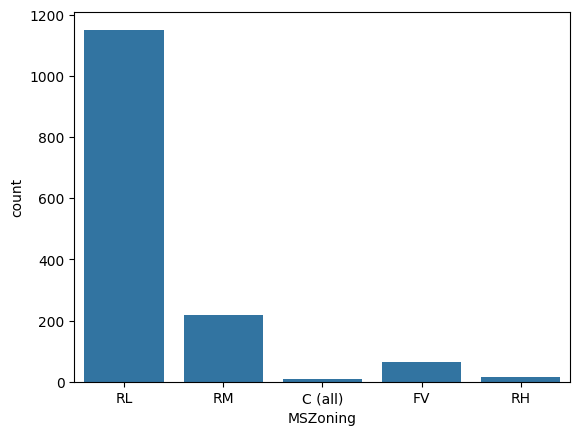

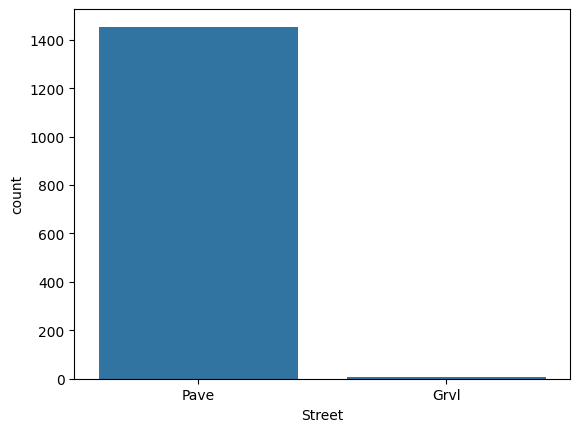

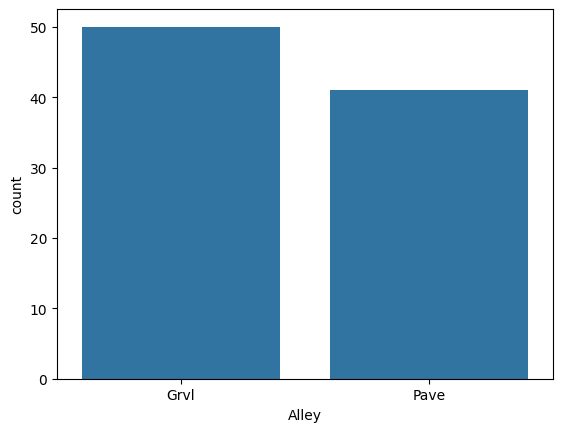

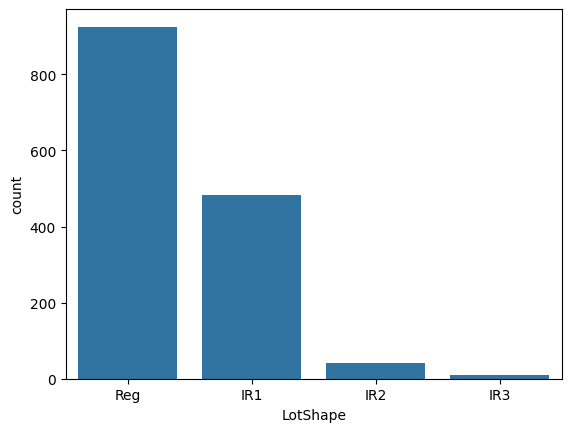

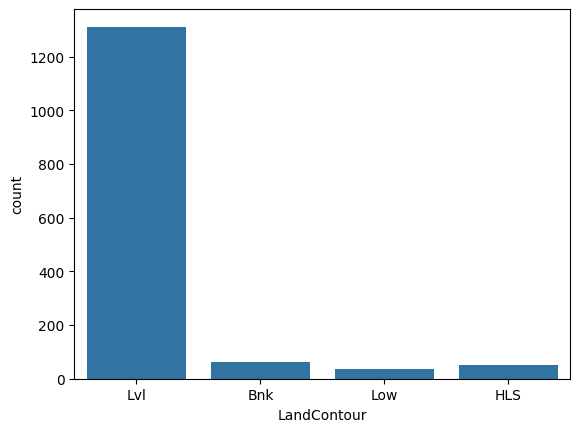

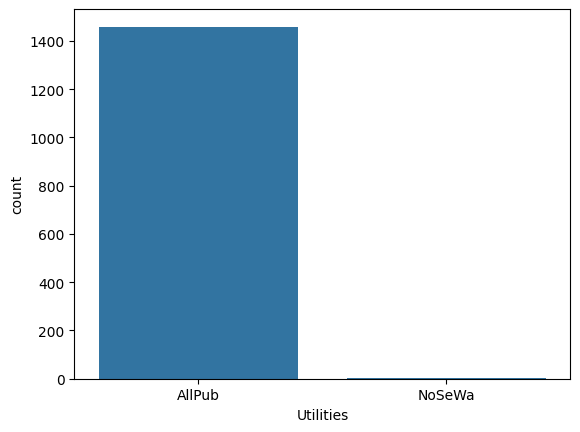

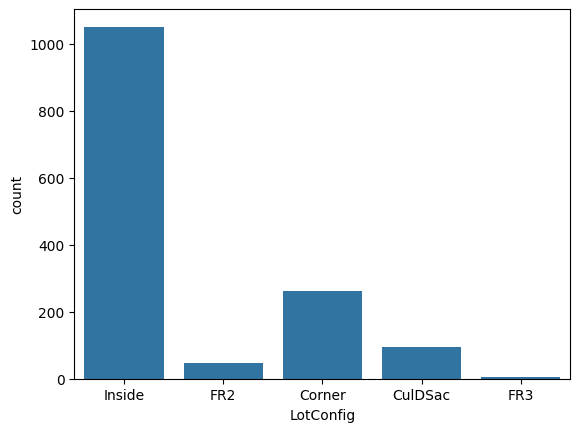

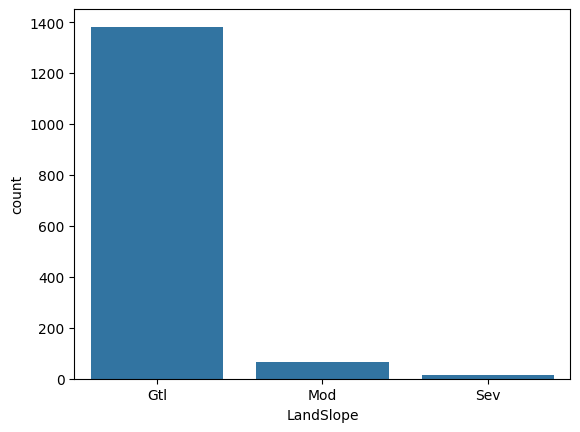

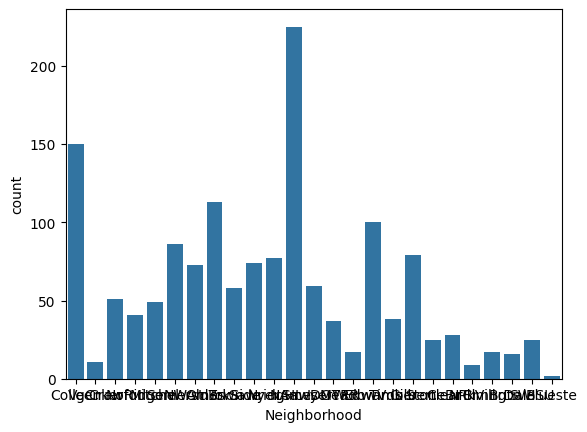

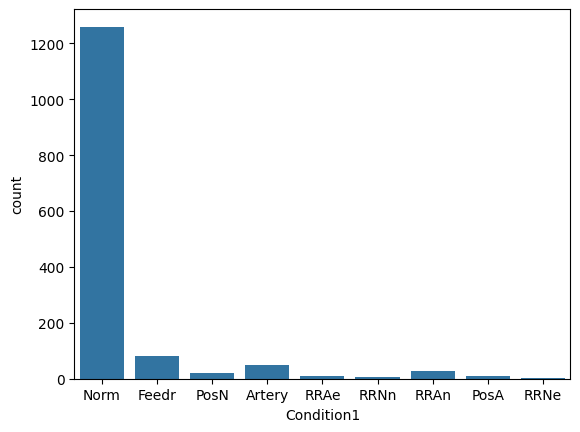

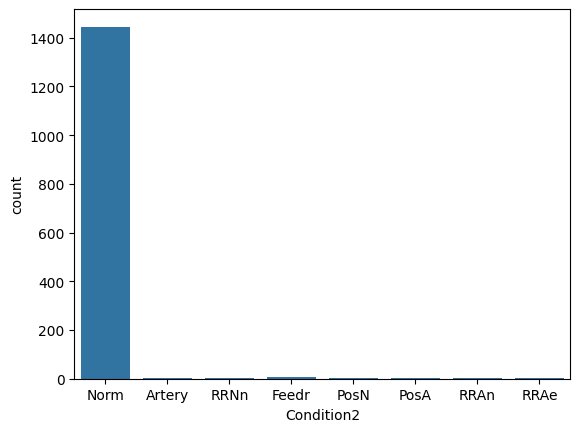

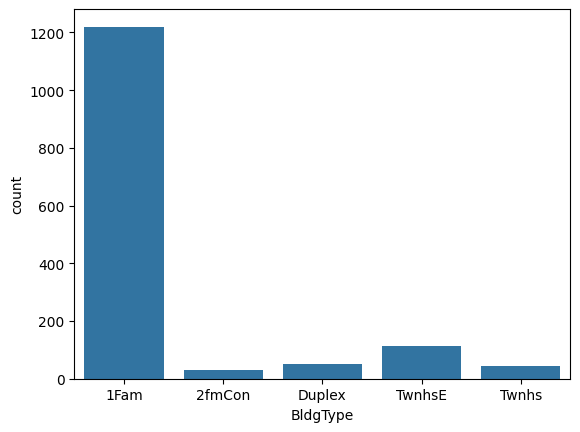

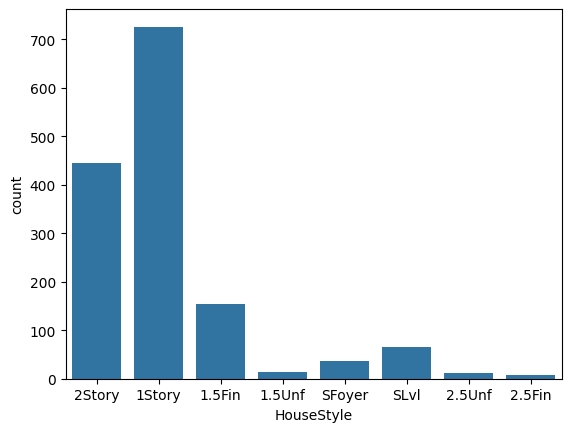

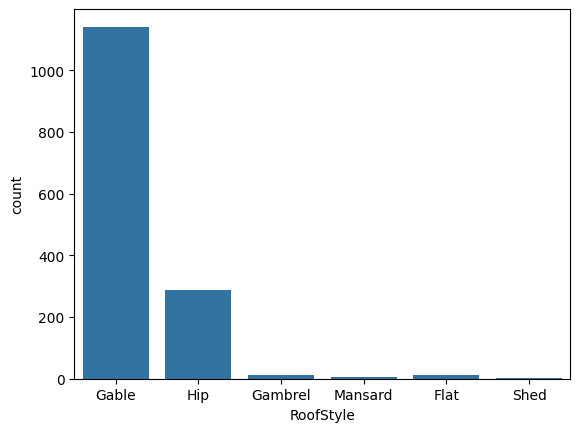

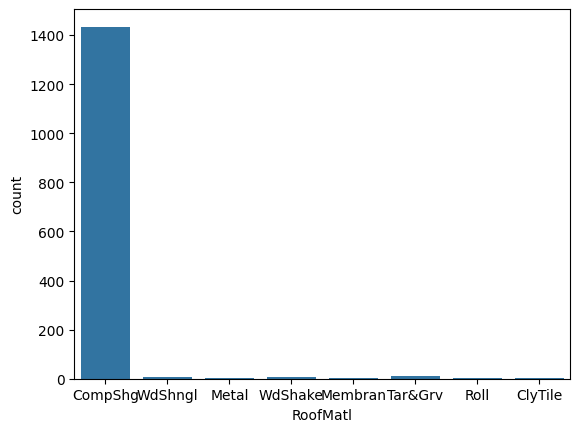

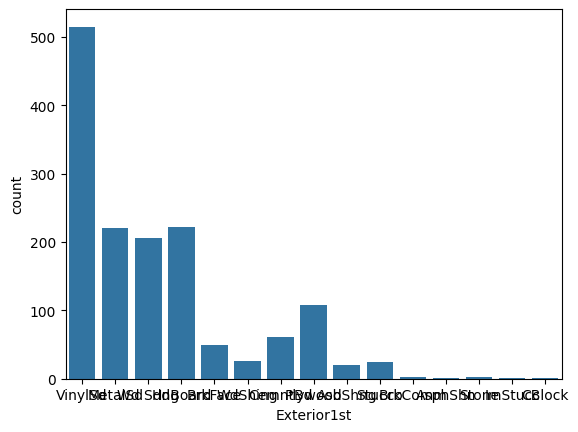

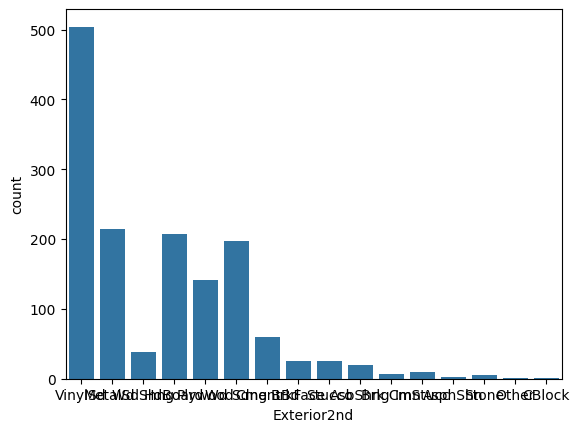

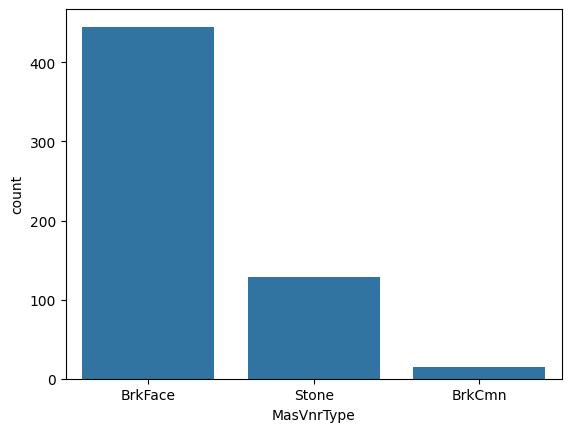

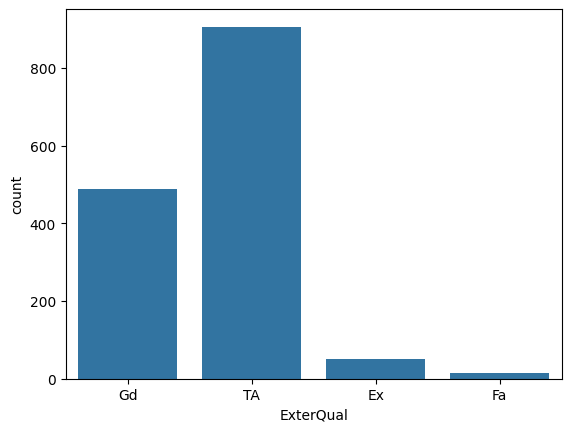

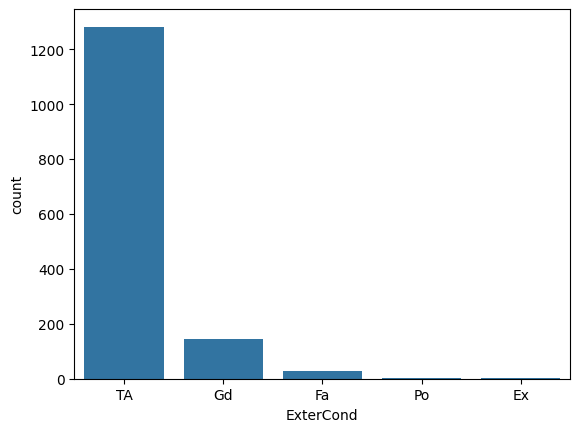

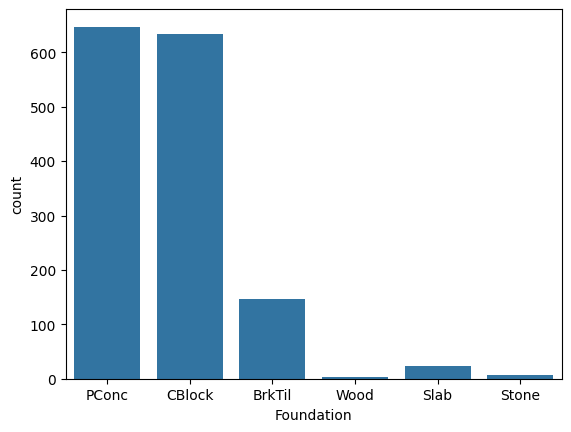

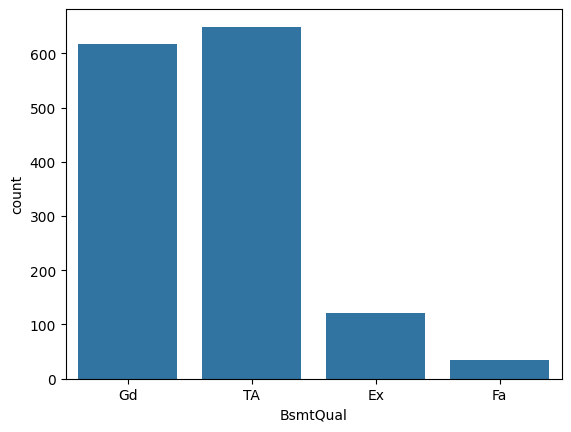

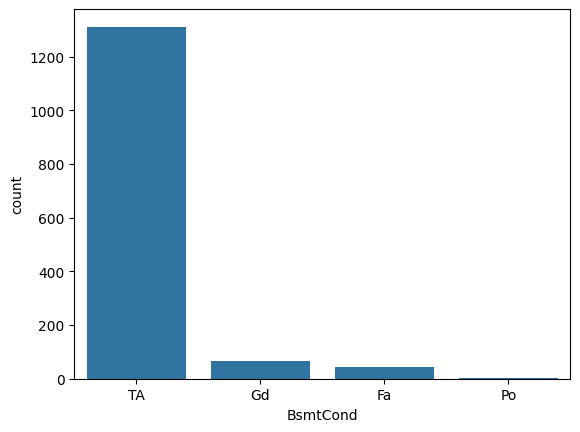

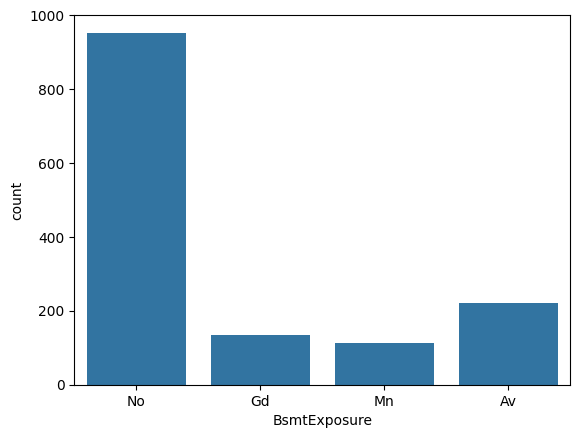

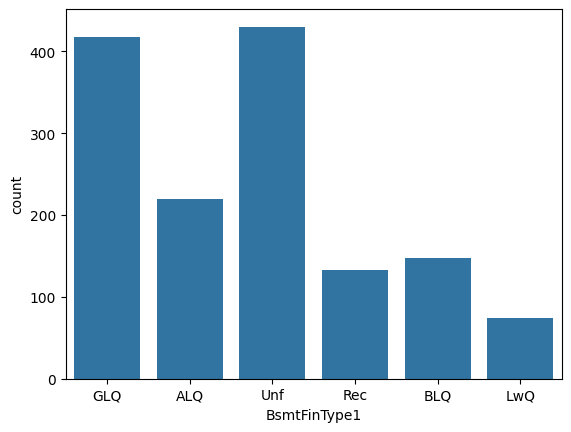

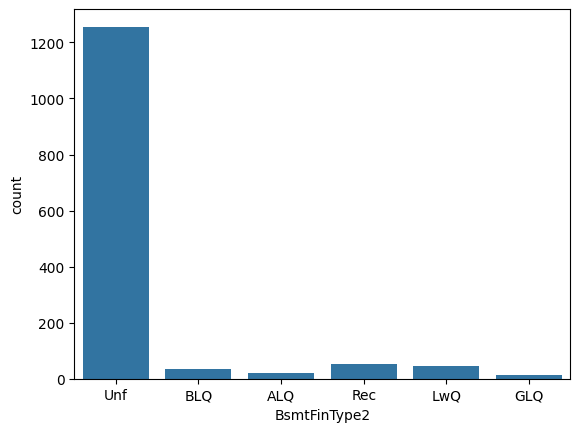

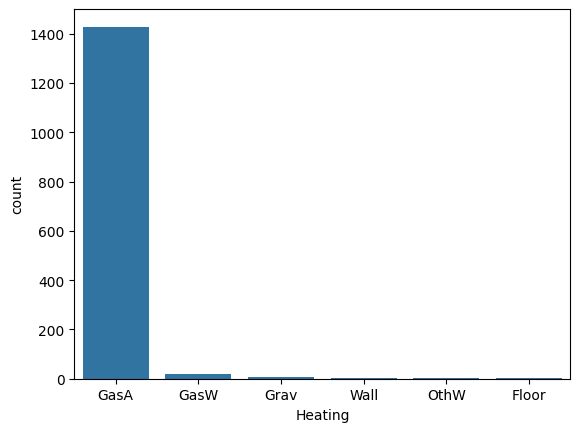

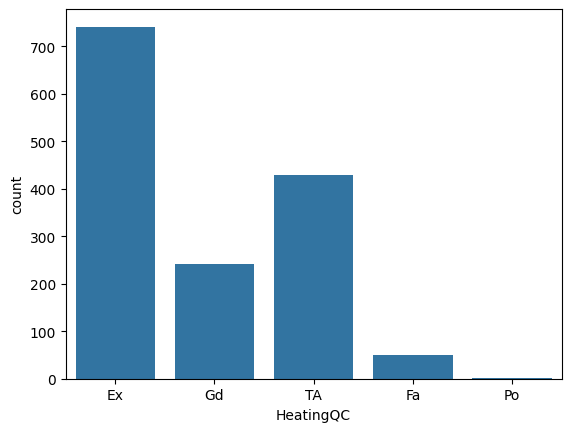

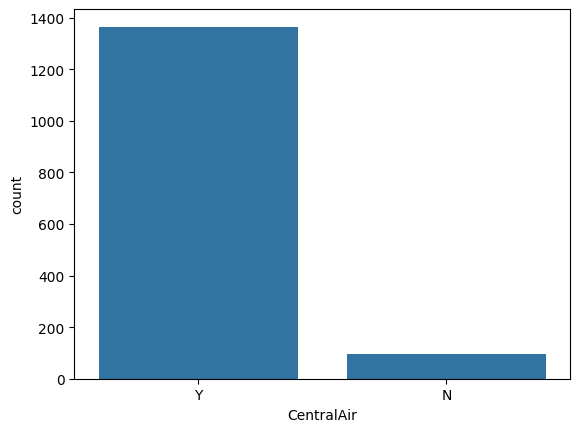

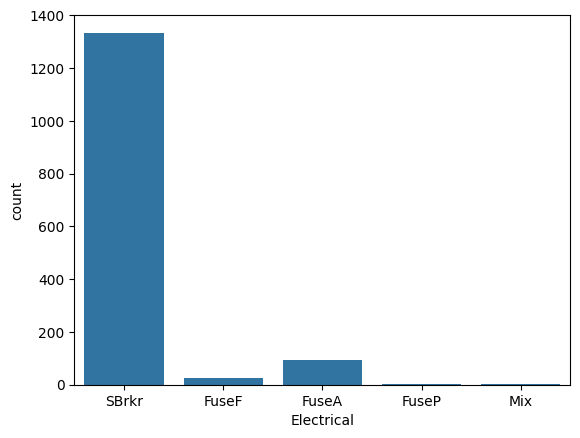

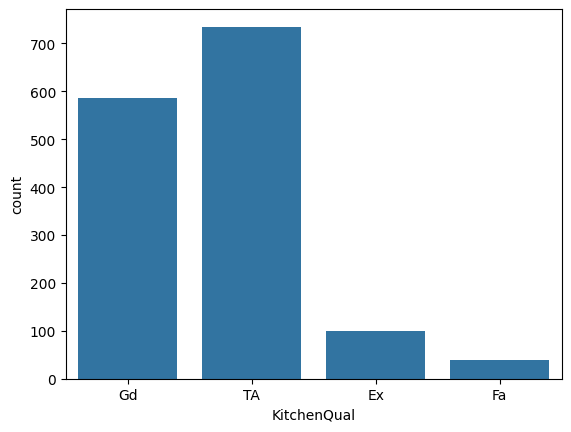

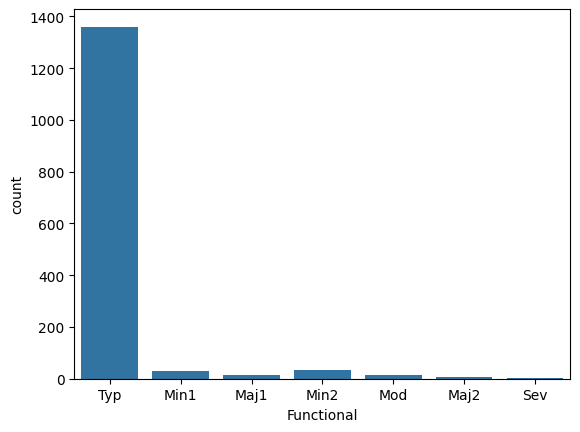

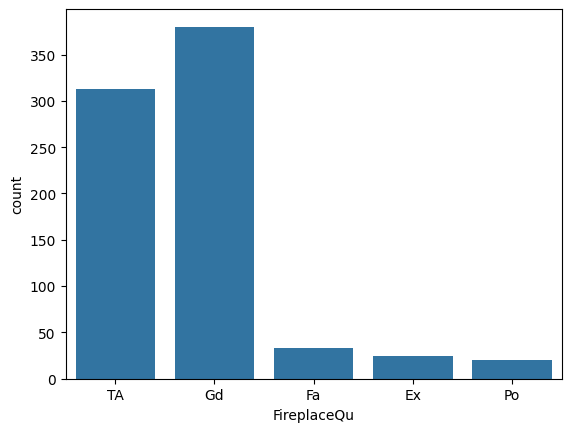

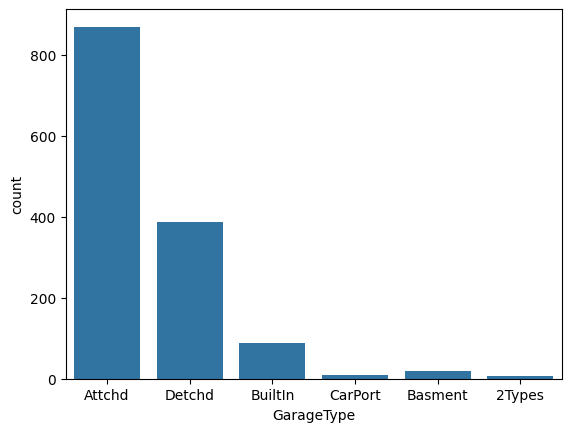

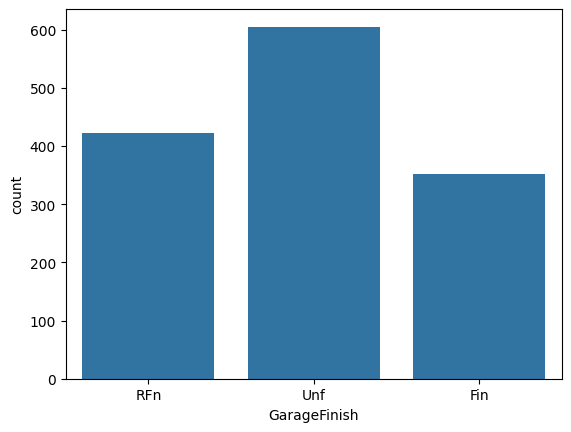

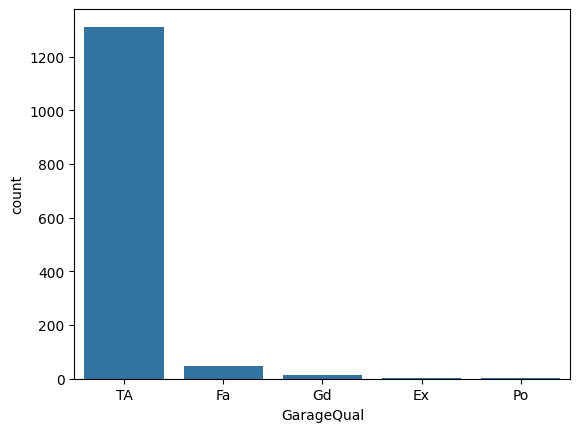

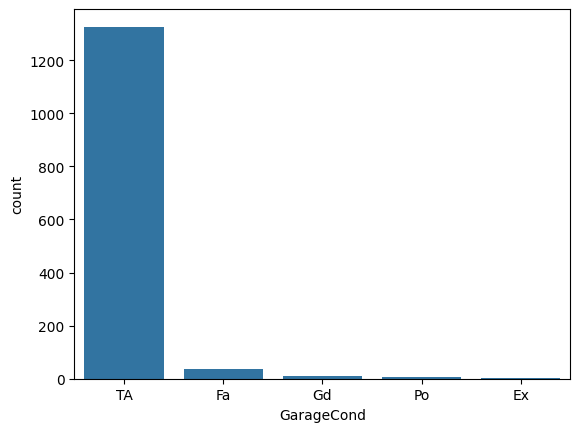

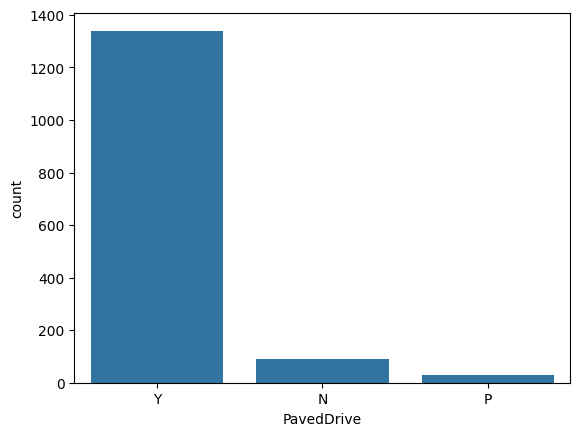

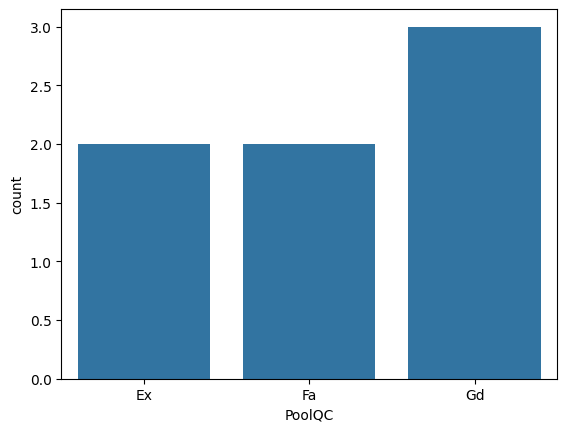

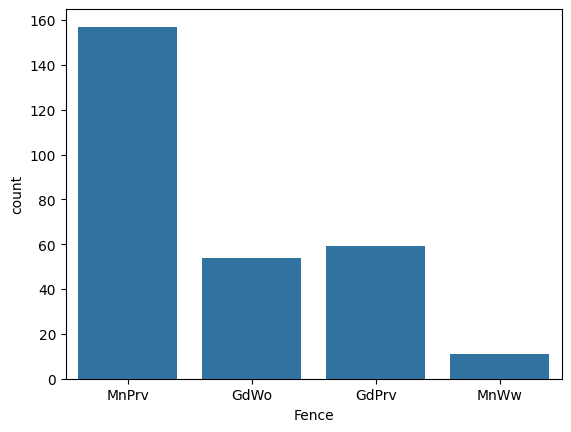

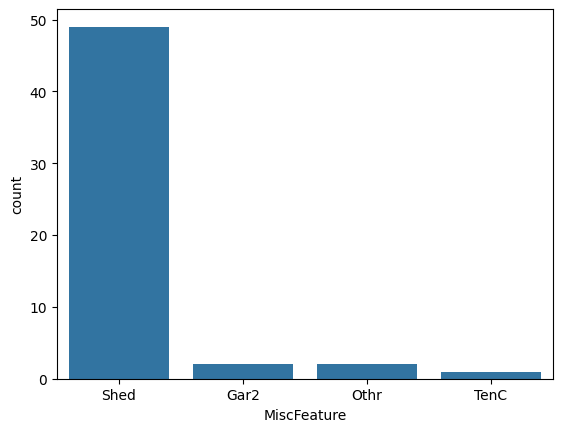

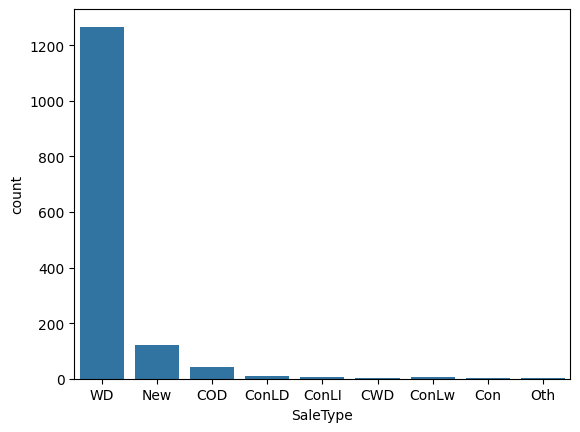

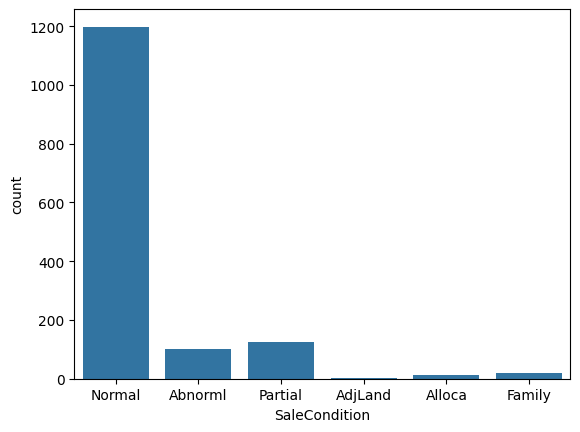

In [ ]:
for i in cat_col:
  sns.countplot(x=data[i])
  plt.show()

**Insights from categorical Columns:-**
1. As per data 86% of houses are in Normal condition.
2. 83.6% of houses are good for single family.
3. The Most popular exterior present in houses is "VinylSd".
4. 60% of houses have attached garage.
5. 93.5% of houses have Central air conditioning.

## 3.2 Histogram Plot for numerical columns

In [ ]:
num_col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

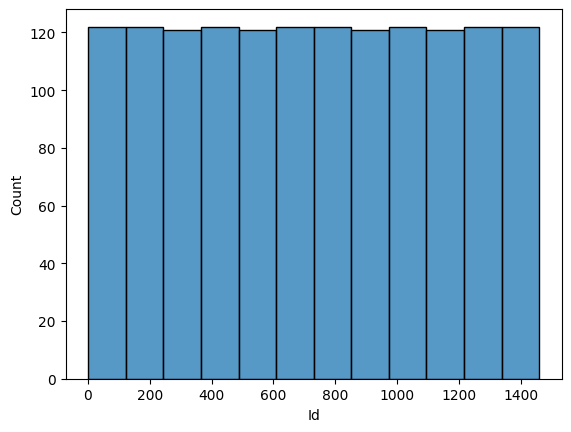

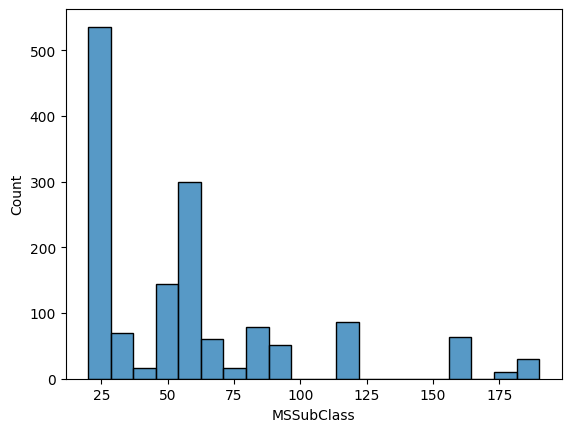

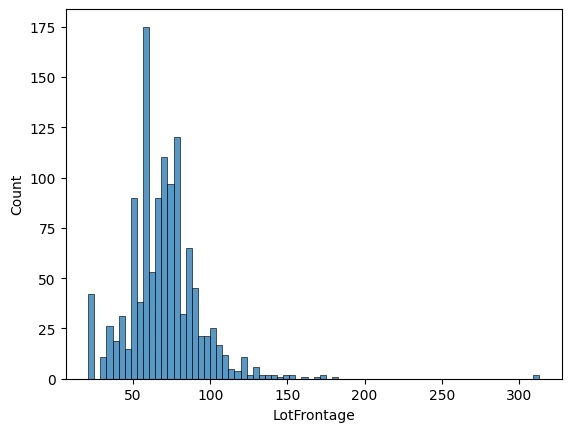

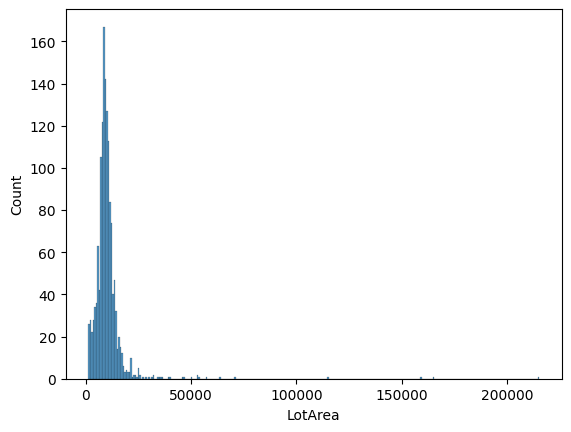

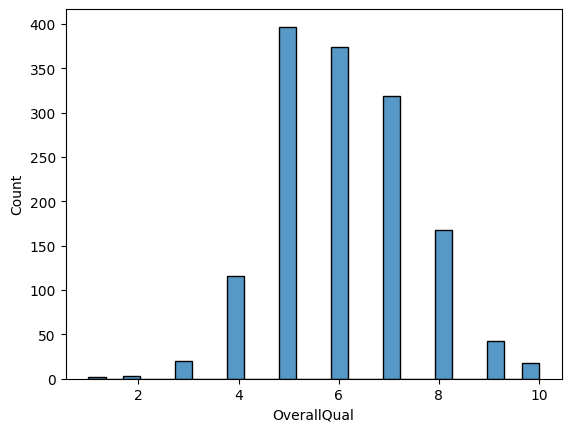

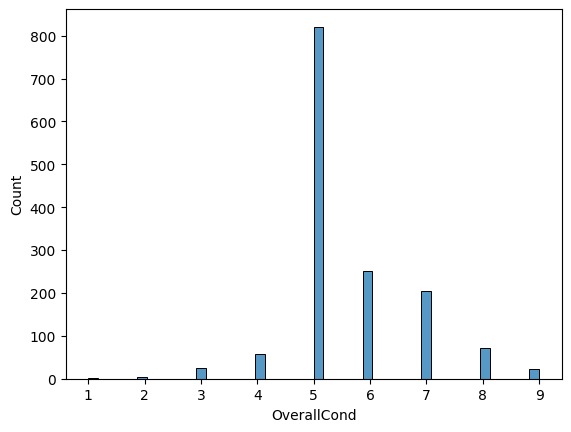

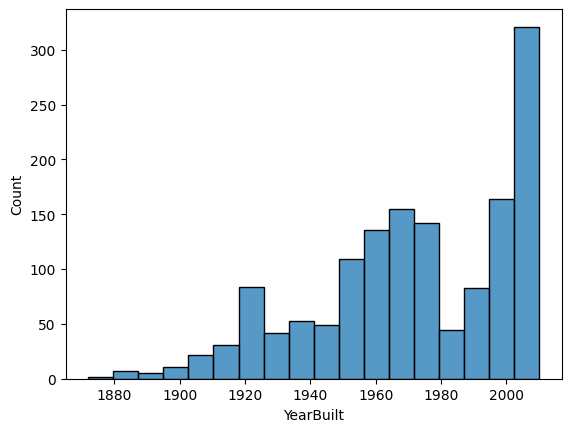

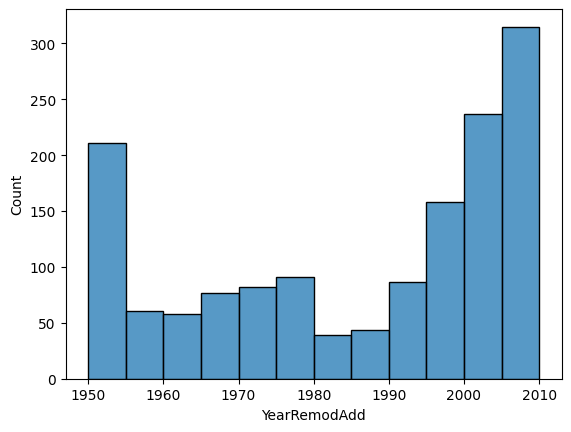

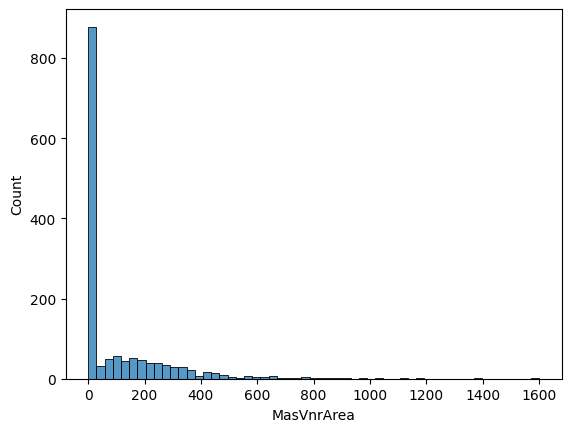

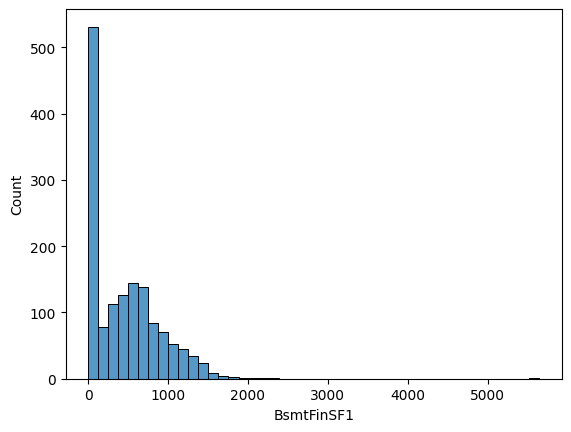

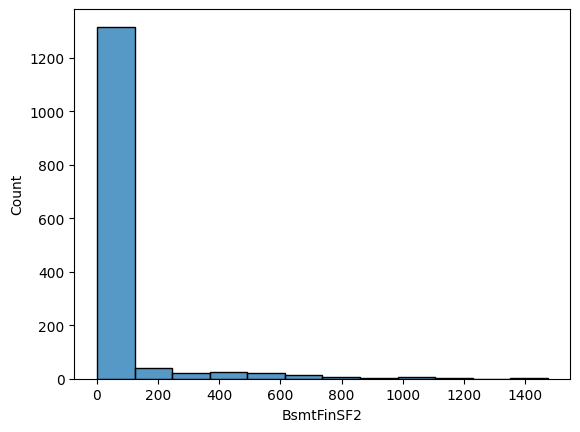

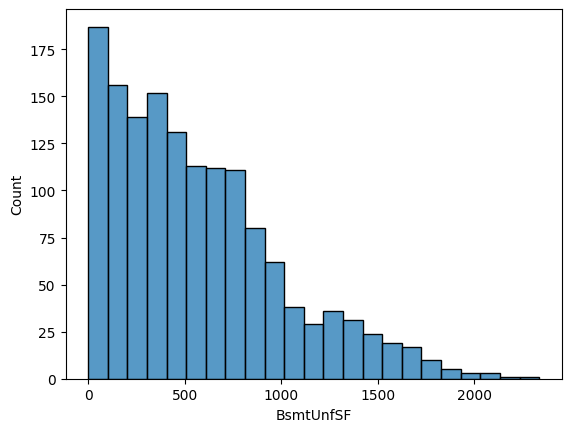

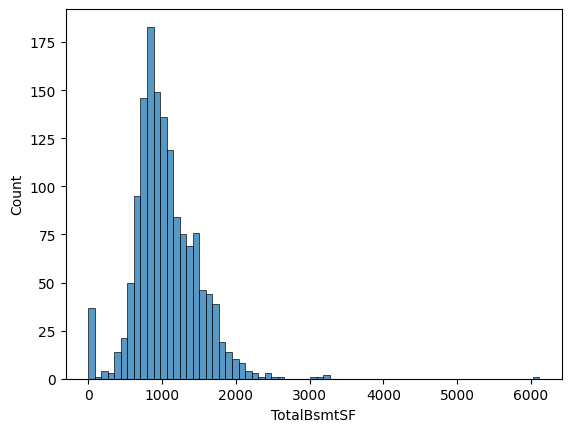

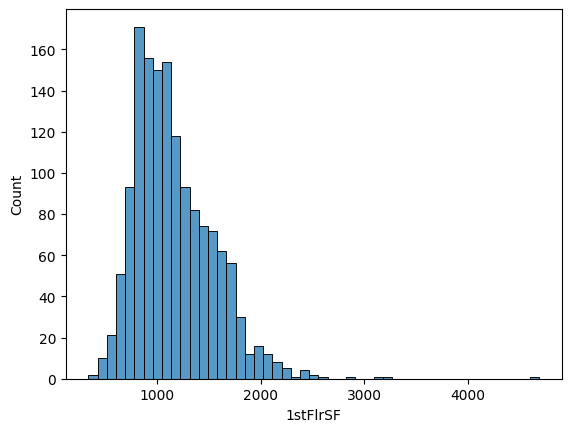

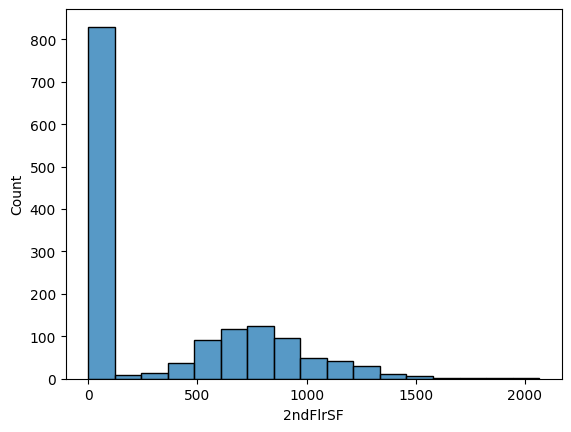

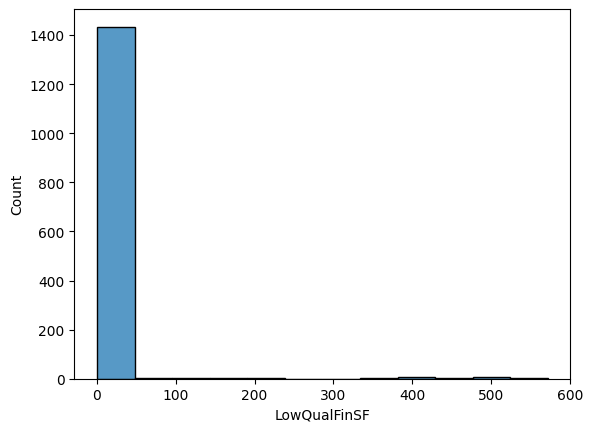

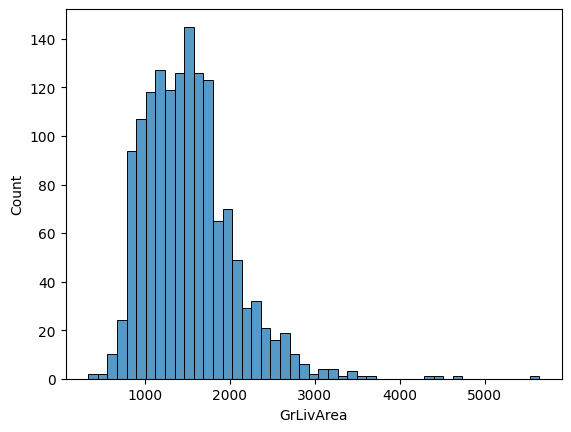

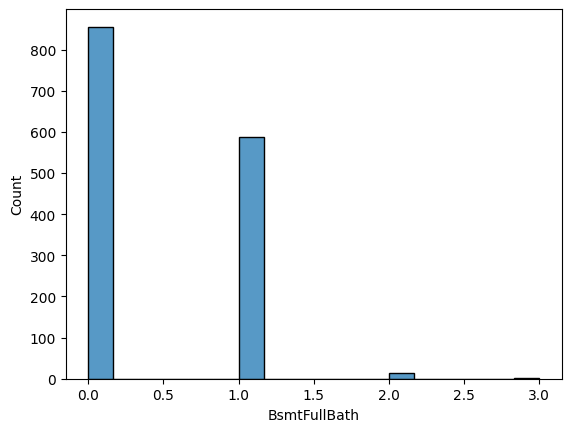

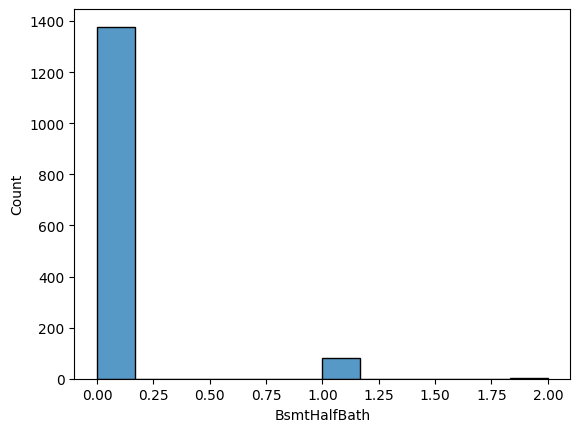

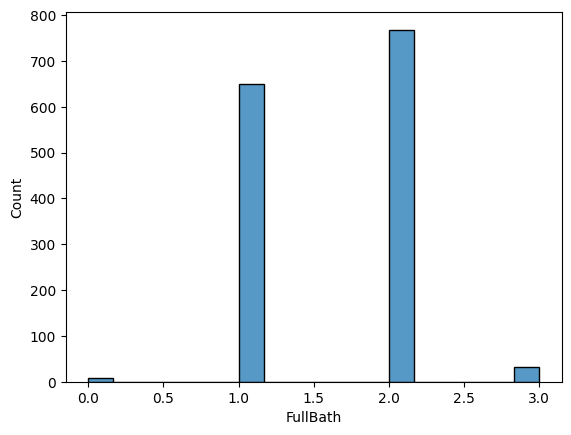

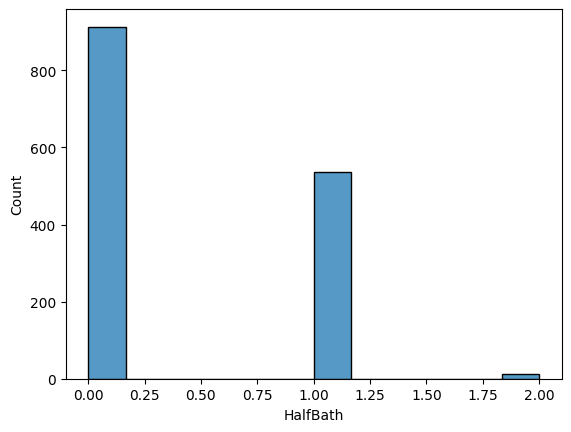

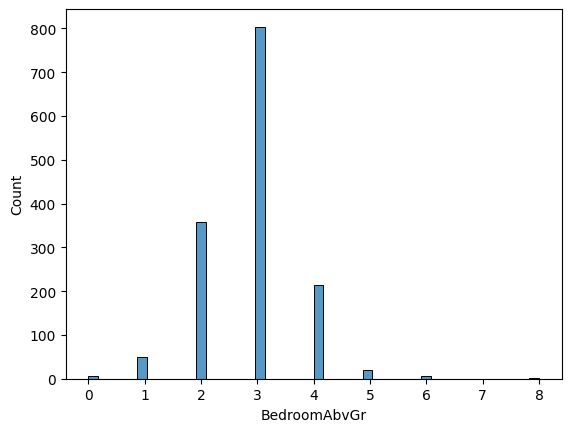

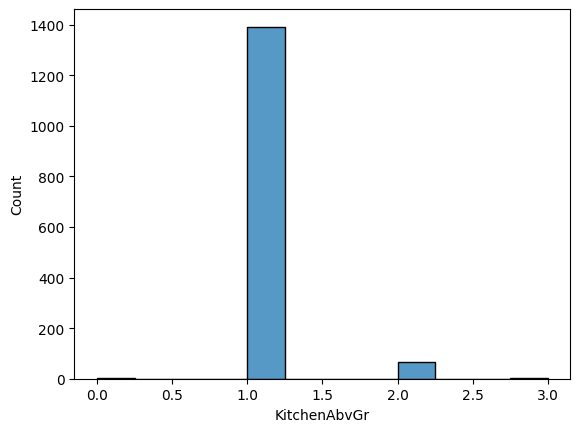

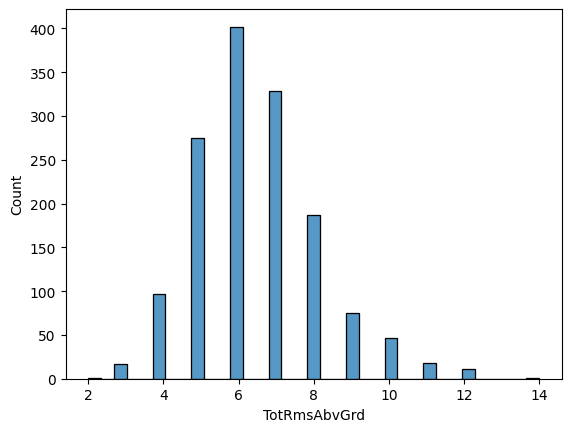

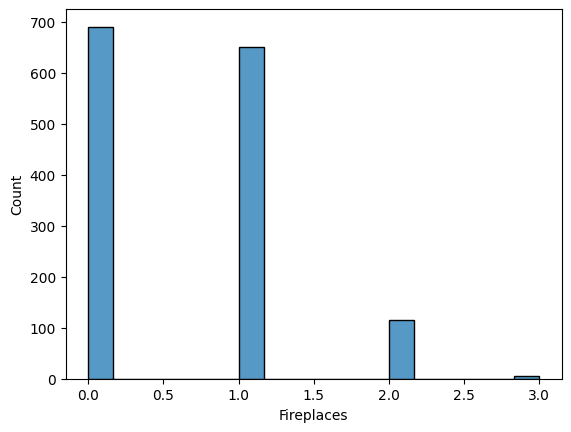

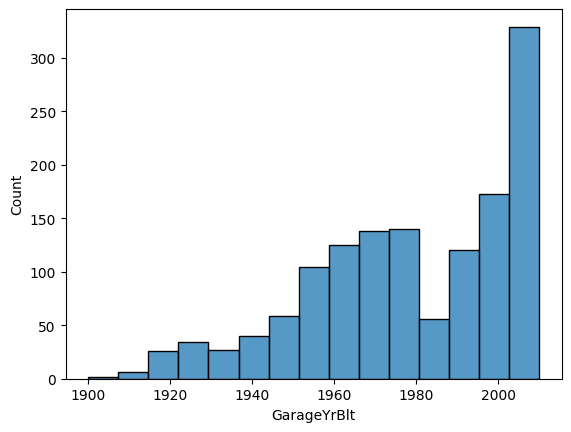

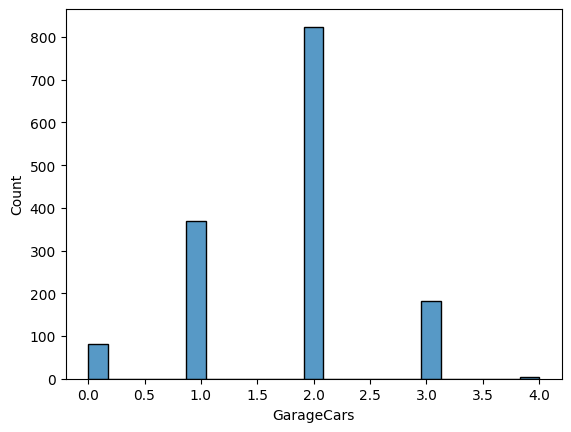

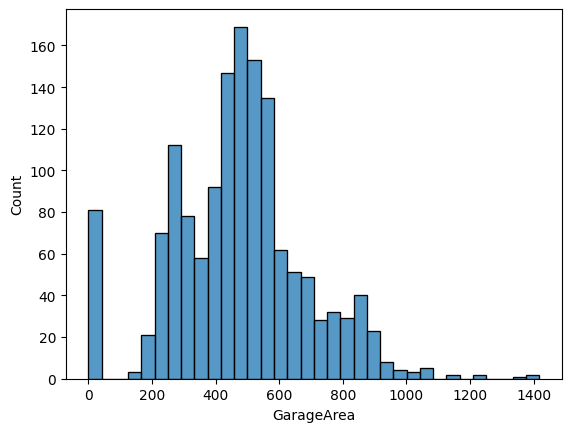

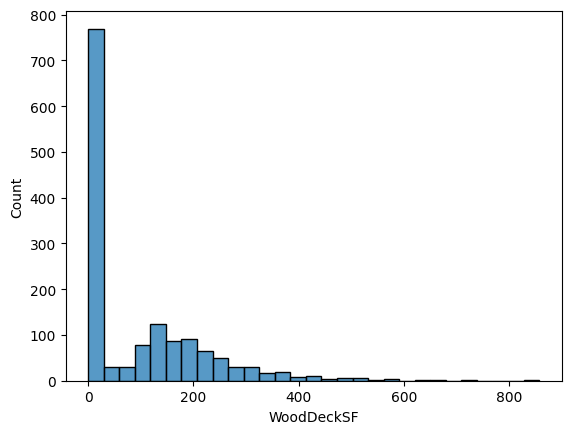

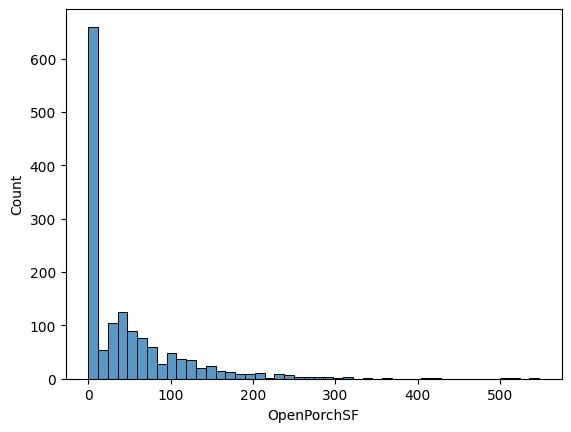

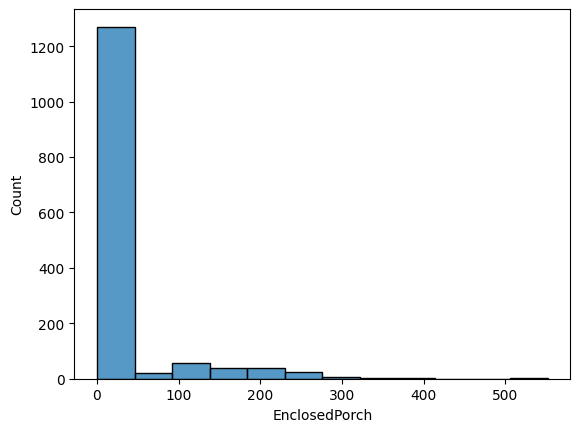

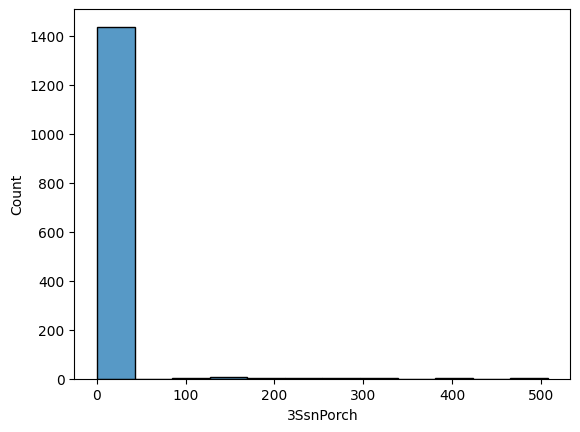

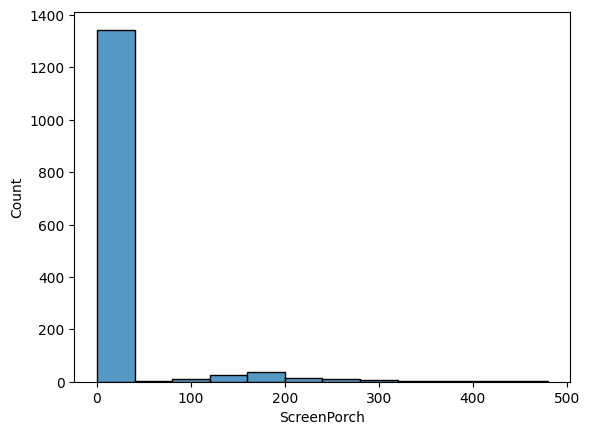

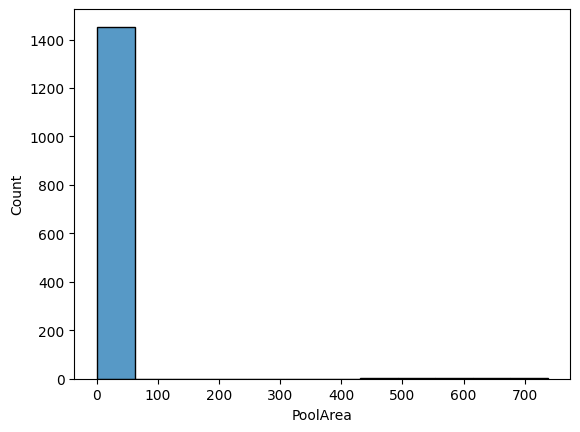

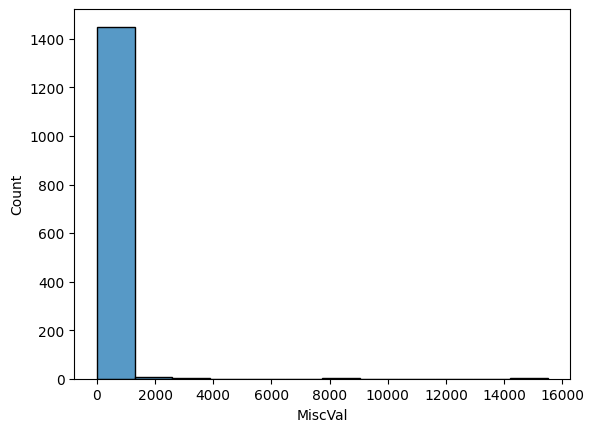

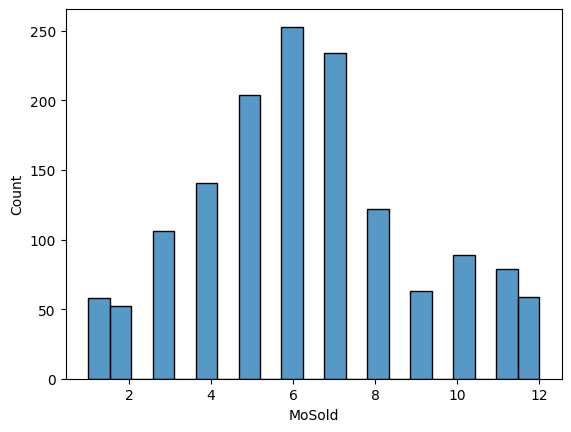

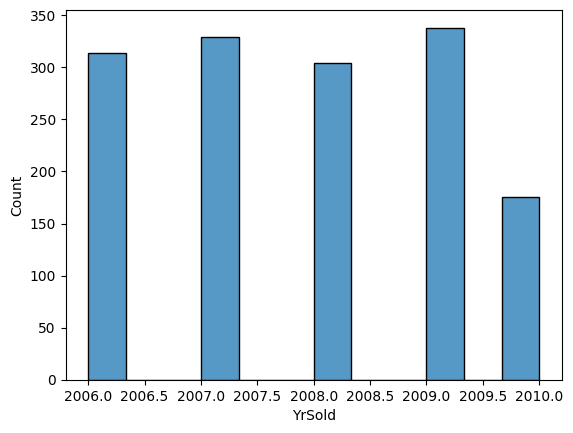

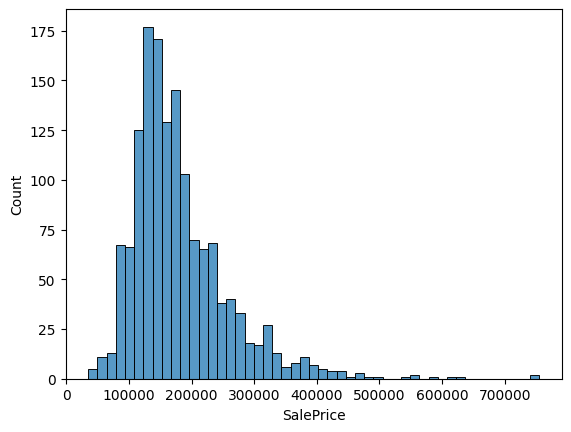

In [ ]:
for i in num_col:
  sns.histplot(x=data[i])
  plt.show()

**Insights from num_cols:-**
1. According to the data, house construction began around 1880. By 1950, there was a noticeable increase in building activity. However, around 1980, there was a decline in construction. Fortunately, within the next five years, building rates rebounded significantly.

2. As per the data, year of construction and year of remodel is proporsonal to each other.

3. According to the data maximum houses have 3 bedrooms, 2 bathrooms, 1 kitchen and 1 attached garage which can carry 2 cars.

## 3.3 Data Analysis with 2 different possible features

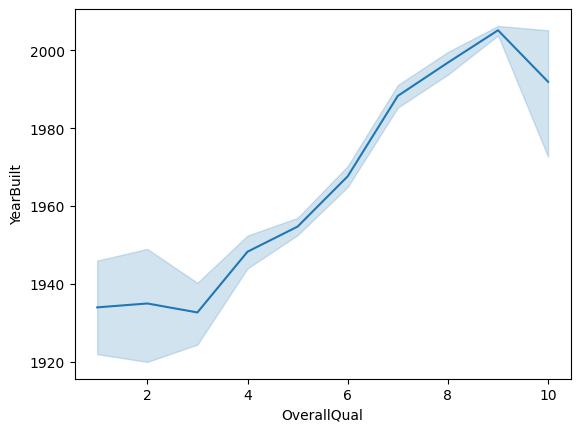

In [ ]:
# Yearbuilt vs Overall quality
sns.lineplot(x=data['OverallQual'],y= data["YearBuilt"])
plt.show()

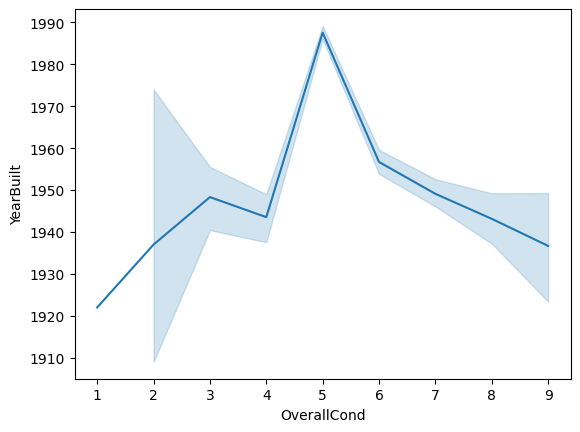

In [ ]:
# year built vs Overall condition
sns.lineplot(x=data['OverallCond'],y= data["YearBuilt"])
plt.show()

**Insight**
1. From 1920 to 1940 the quality of houses are not good.
2. From 1945 to 1980 the quality of houses are good.
3. After 1980 the quality of houses are excellent.

<Axes: xlabel='BsmtFinType1', ylabel='BsmtFinSF1'>

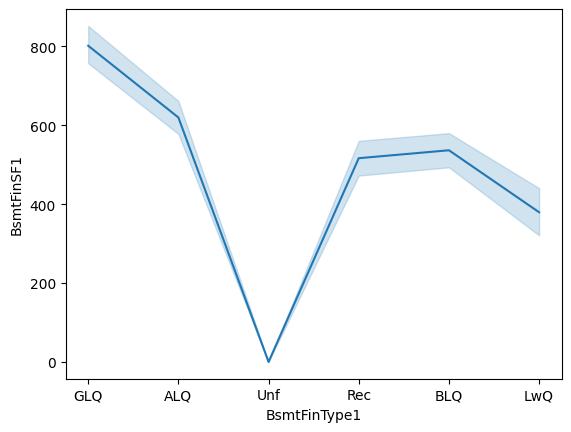

In [ ]:
# Basement quality and size
sns.lineplot(data, x= "BsmtFinType1", y= "BsmtFinSF1" )

<Axes: xlabel='BsmtFinType2', ylabel='BsmtFinSF2'>

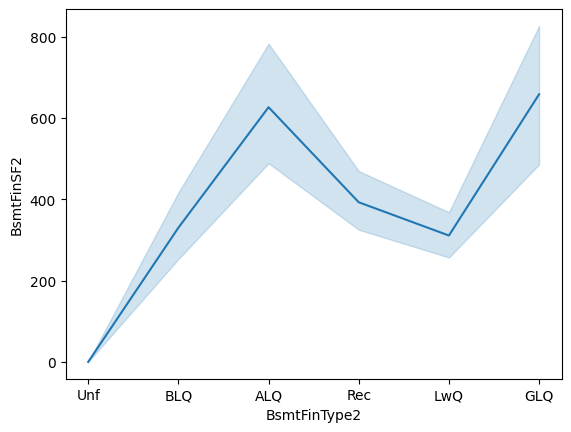

In [ ]:
# Quality and size of second finished area (if present)
sns.lineplot(data, x= "BsmtFinType2", y= "BsmtFinSF2" )

**Notes**

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet


*   GLQ (Good Living Quarters) have confortable space.
*   Unf (Unfinished) have small space not comfortable for living, typically used for storage, laundry, or mechanical systems.



## 3.4 Analysing logical features from data with target column.

In [ ]:
# Storing the logical features into a new variable.

loc = data[['ExterCond','CentralAir','ExterQual','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCars','GarageType','PoolQC','1stFlrSF', '2ndFlrSF','LowQualFinSF','FullBath','BedroomAbvGr','TotRmsAbvGrd']]


In [ ]:
loc_cat= loc.select_dtypes(include='object').columns
loc_num= loc.select_dtypes(exclude='object').columns

In [ ]:
loc_cat

Index(['ExterCond', 'CentralAir', 'ExterQual', 'BsmtQual', 'BsmtCond',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageType',
       'PoolQC'],
      dtype='object')

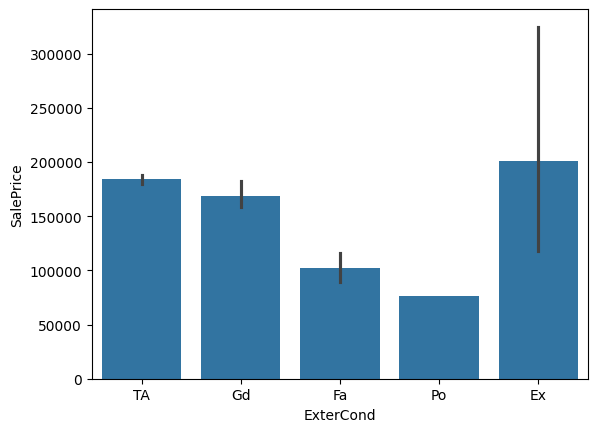

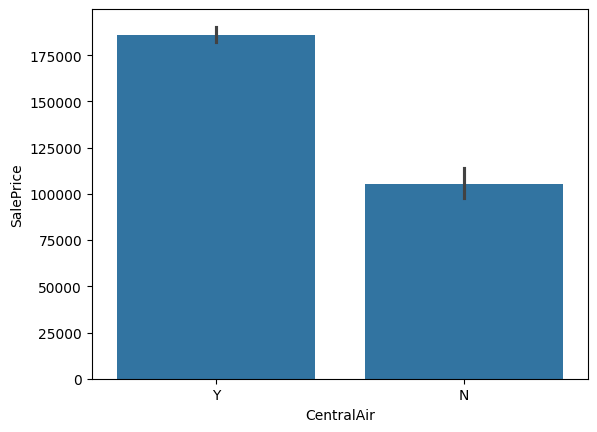

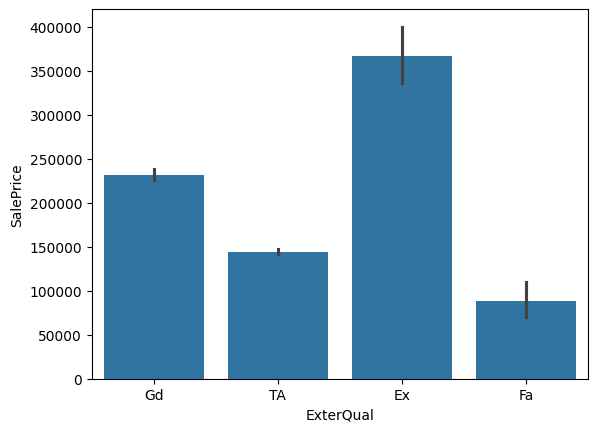

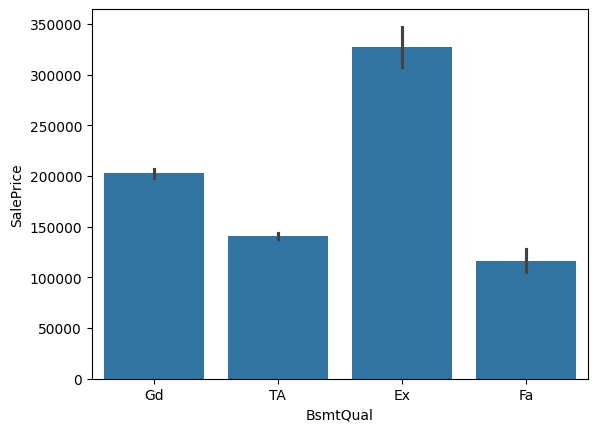

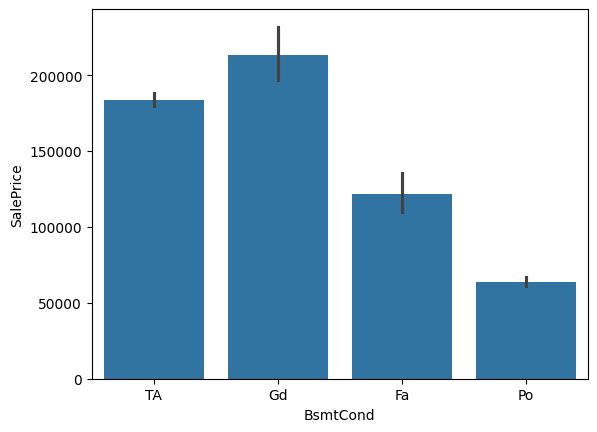

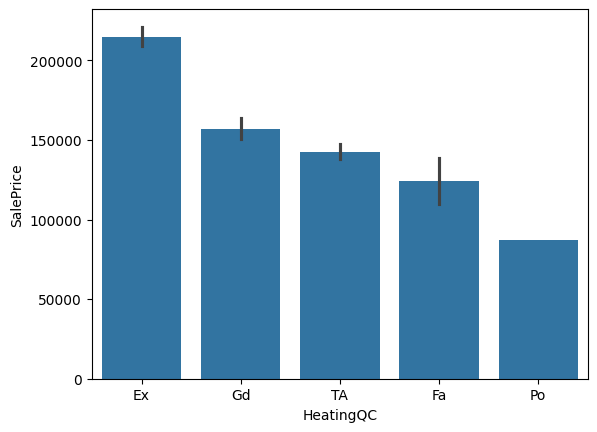

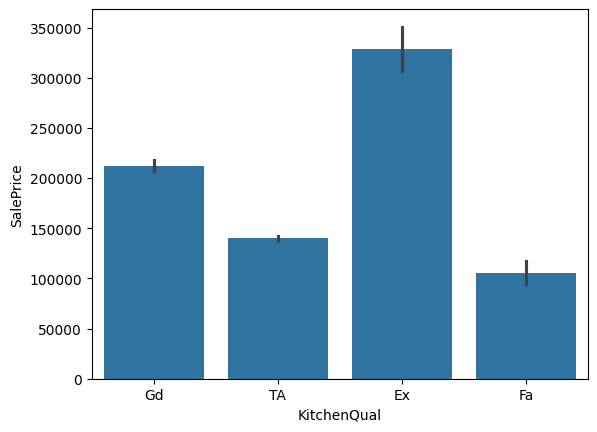

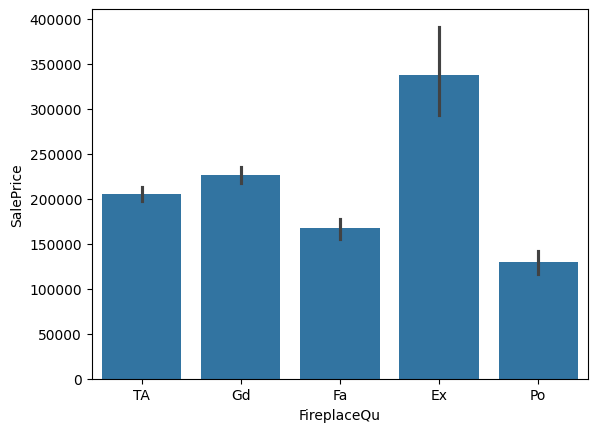

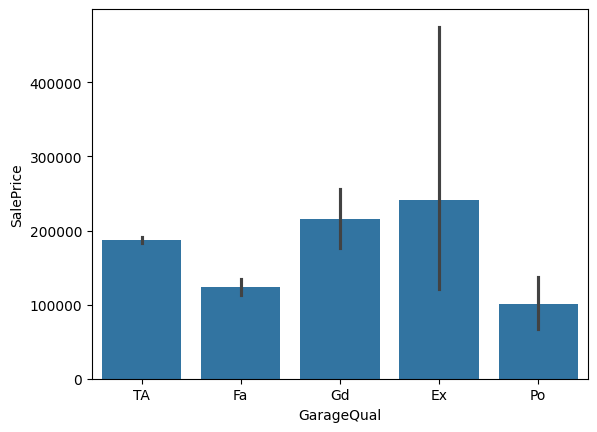

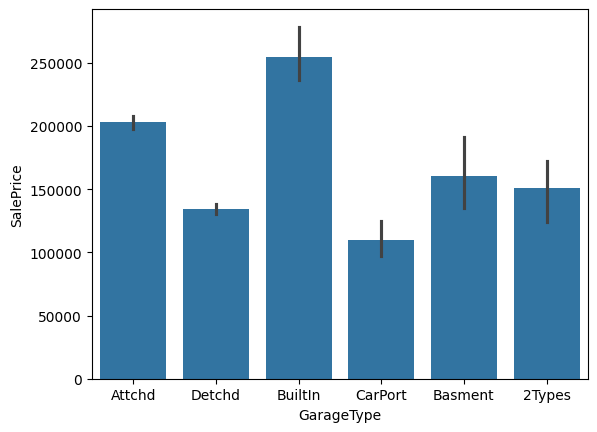

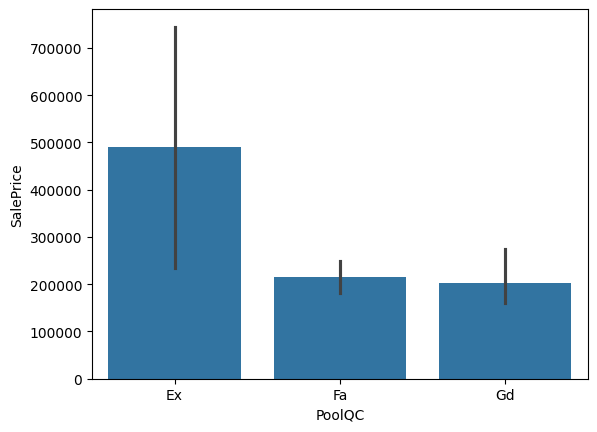

In [ ]:
for i in loc_cat:
  sns.barplot(x= data[i],y= data["SalePrice"])
  plt.show()

**Insights**
1. The quality of Exterior, basement, kitchen, garage,pool are directly connected to the sales price.
*   Ex:- Excellent
*   Gd:- Good
*   TA:- Typical
*   Fa:- Fair
*   Po:- Poor

2. Approx Salesprice for each quality
*   Excellent :- more than $300000

*   Typical and Good  :- more than $200000

*   Fair and poor :- less than $200000







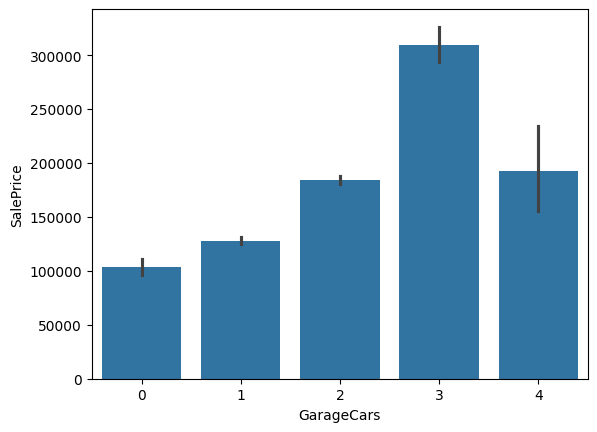

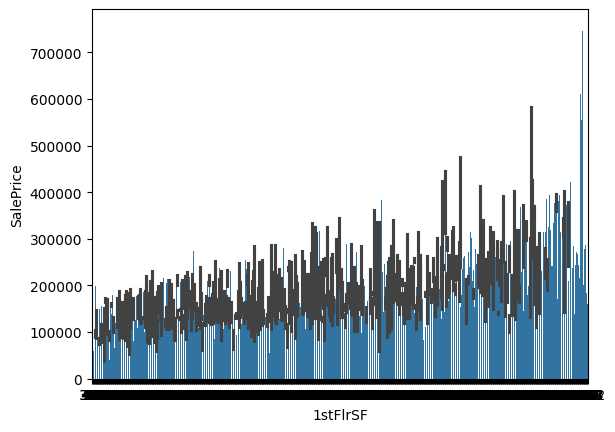

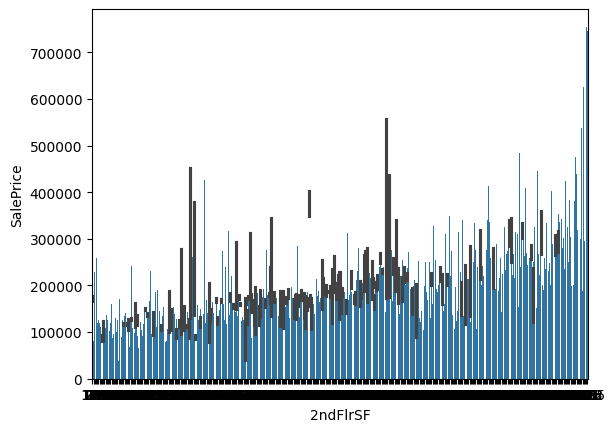

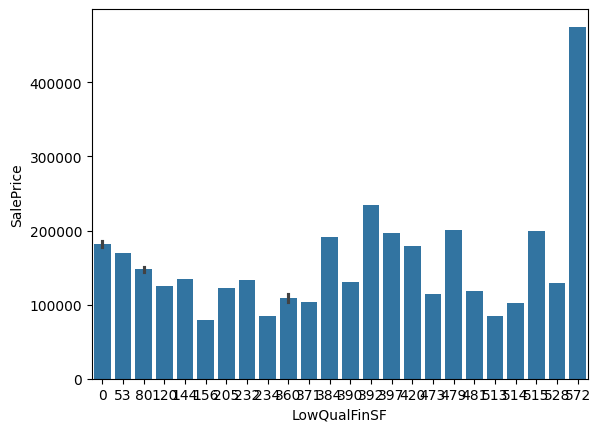

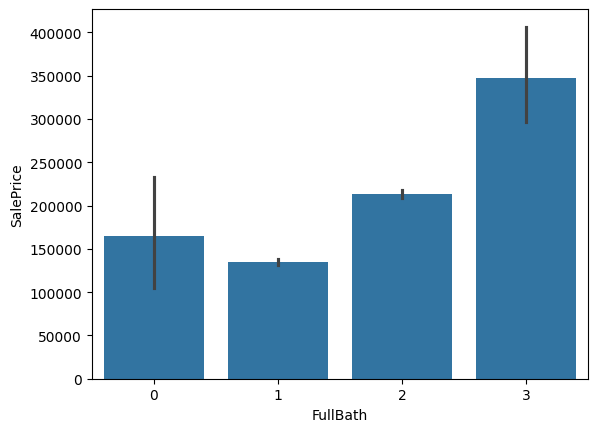

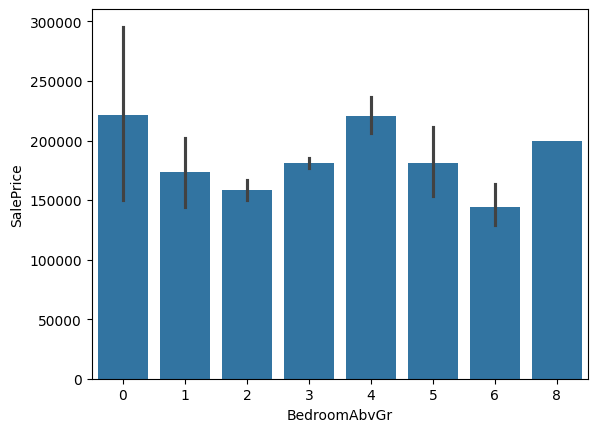

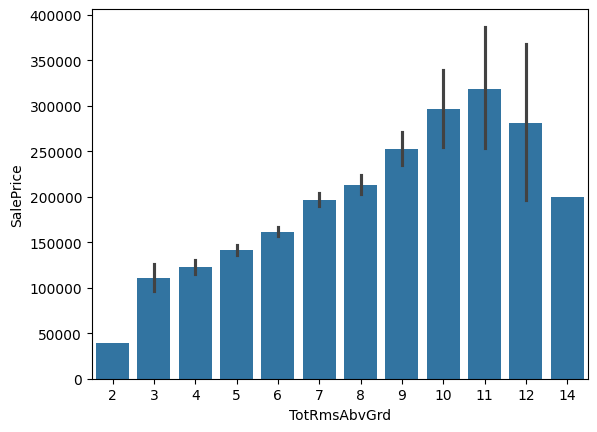

In [ ]:
for i in loc_num:
  sns.barplot(x= data[i],y= data["SalePrice"])
  plt.show()

Not get any insight from loc_num.

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

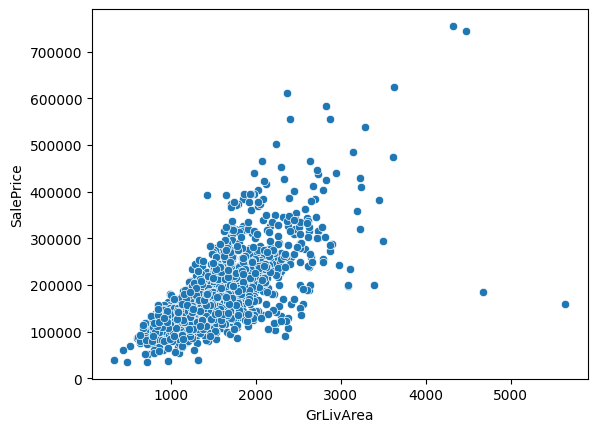

In [ ]:
#GrLivArea:- Above grade (ground) living area square feet
sns.scatterplot(data, x= "GrLivArea", y= "SalePrice")

* The scatter plot of GrLivArea and saleprice is **Heteroscedasticity**.



<Axes: xlabel='1stFlrSF', ylabel='SalePrice'>

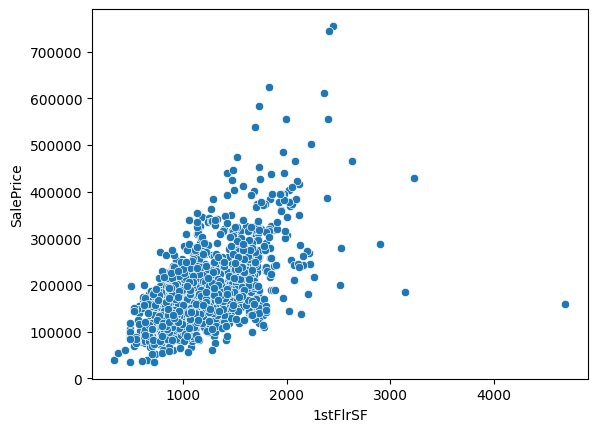

In [ ]:
sns.scatterplot(data, x= "1stFlrSF", y= "SalePrice")

* The scatter plot of 1stFlrSF and saleprice is **Heteroscedasticity**.



<Axes: xlabel='2ndFlrSF', ylabel='SalePrice'>

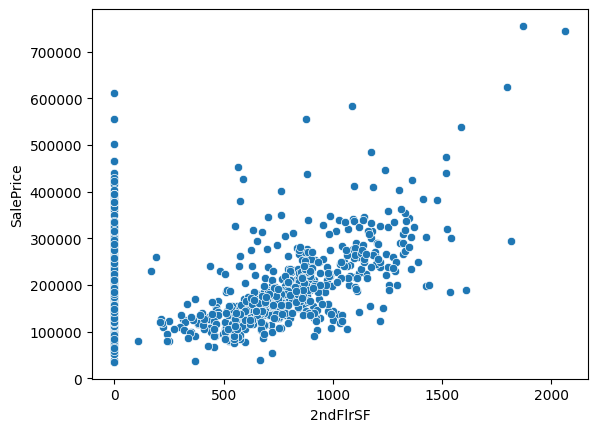

In [ ]:
sns.scatterplot(data, x= "2ndFlrSF", y= "SalePrice")

* Not get any insight.

<Axes: xlabel='LowQualFinSF', ylabel='SalePrice'>

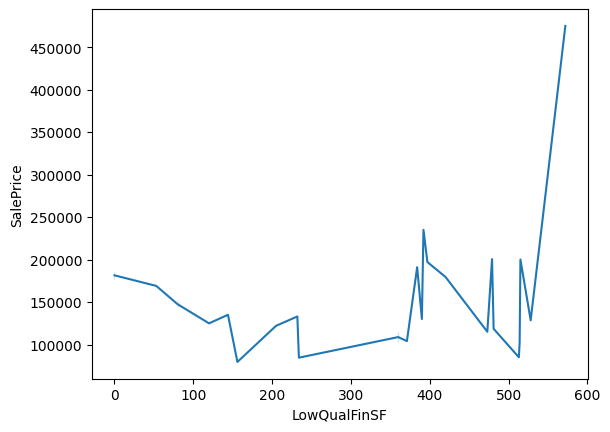

In [ ]:
sns.lineplot(data,x= 'LowQualFinSF', y= 'SalePrice')

## 3.5. Feature Extraction

In [ ]:
df1= data.copy()
age_of_house_sold = data['YrSold'] - data['YearBuilt']
df1['age_of_house_sold'] = age_of_house_sold

In [ ]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,age_of_house_sold
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,7
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,91
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,8


In [ ]:
import plotly.express as px
fig = px.scatter(data, x="age_of_house_sold", y="SalePrice", trendline="ols")
fig.show()

In [ ]:
# Age of House till 2011
df1['age_of_house_till_2011'] = 2011 - data['YearBuilt']


In [ ]:
fig = px.histogram(df1, x="age_of_house_till_2011", y="SalePrice", color_discrete_sequence = ['yellowgreen'])
fig.update_layout(bargap=0.1)

# 4. Data_Preprocessing

In [ ]:
# Droping irrelevant features
data.drop(['Id','PoolQC','FireplaceQu','MasVnrType','Alley','MiscFeature','Fence'],axis=1,inplace=True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
# Handling missing values
data.isnull().sum()

,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


These are the following features and there data types which carries null values.

* GarageCond- Object

* GarageQual- Object

* GarageFinish- Object

* GarageYrBlt- Float

* GarageType- Object

* Electrical- Object

* BsmtFinType2- Object

* BsmtFinType1- Object

* BsmtExposure- Object

* BsmtCond- Object

* BsmtQual- Object

* LotFrontage- float

## 4.1 Replacing Null Values

In [ ]:
#print(data['MSZoning'].mode())
print(data['GarageCond'].mode())
print(data['GarageQual'].mode())
print(data['GarageFinish'].mode())
print(data['GarageYrBlt'].mode())
print(data['GarageType'].mode())
print(data['Electrical'].mode())
print(data['BsmtFinType2'].mode())
print(data['BsmtFinType1'].mode())
print(data['BsmtExposure'].mode())
print(data['BsmtCond'].mode())
print(data['BsmtQual'].mode())
print(data['LotFrontage'].mean())
print(data['MasVnrArea'].mode())


0    TA
Name: GarageCond, dtype: object
0    TA
Name: GarageQual, dtype: object
0    Unf
Name: GarageFinish, dtype: object
0    2005.0
Name: GarageYrBlt, dtype: float64
0    Attchd
Name: GarageType, dtype: object
0    SBrkr
Name: Electrical, dtype: object
0    Unf
Name: BsmtFinType2, dtype: object
0    Unf
Name: BsmtFinType1, dtype: object
0    No
Name: BsmtExposure, dtype: object
0    TA
Name: BsmtCond, dtype: object
0    TA
Name: BsmtQual, dtype: object
70.04995836802665
0    0.0
Name: MasVnrArea, dtype: float64


In [ ]:
data.loc[data['GarageCond'].isnull()==True,'GarageCond'] ='TA'

In [ ]:
data.loc[data['GarageQual'].isnull()==True,'GarageQual'] ='TA'

In [ ]:
data.loc[data['GarageFinish'].isnull()==True,'GarageFinish'] ='Unf'

In [ ]:
data.loc[data['GarageYrBlt'].isnull()==True,'GarageYrBlt'] =2005

In [ ]:
data.loc[data['GarageType'].isnull()==True,'GarageType'] ='Attchd'

In [ ]:
data.loc[data['Electrical'].isnull()==True,'Electrical'] ='SBrkr'

In [ ]:
data.loc[data['BsmtFinType2'].isnull()==True,'BsmtFinType2'] ='Unf'

In [ ]:
data.loc[data['BsmtFinType1'].isnull()==True,'BsmtFinType1'] ='Unf'

In [ ]:
data.loc[data['BsmtExposure'].isnull()==True,'BsmtExposure'] ='No'

In [ ]:
data.loc[data['BsmtCond'].isnull()==True,'BsmtCond'] ='TA'

In [ ]:
data.loc[data['BsmtQual'].isnull()==True,'BsmtQual'] ='TA'

In [ ]:
data.loc[data['LotFrontage'].isnull()==True,'LotFrontage'] =70.04

In [ ]:
data.loc[data['MasVnrArea'].isnull()==True,'MasVnrArea'] =0.0

## 4.2 Outliers Detection

In [ ]:
num_col= data.select_dtypes(exclude='object').columns
num_col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
# box plot
for i in num_col:
  sns.boxplot(data[i])
  plt.show()

NameError: name 'num_col' is not defined

## 4.3 Perform correlation for features reduction

<Axes: >

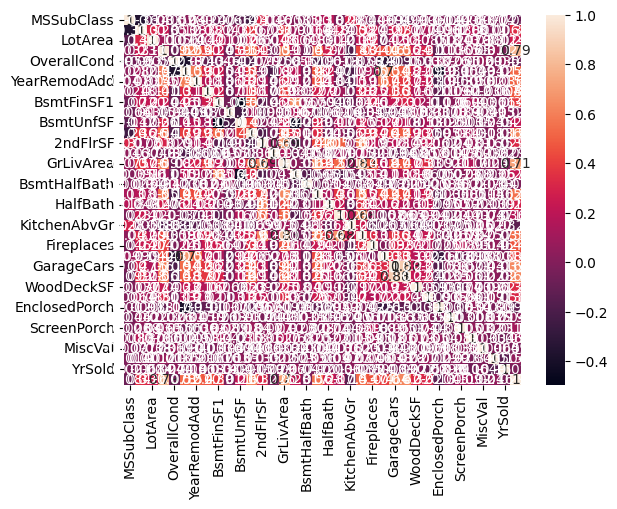

In [ ]:
sns.heatmap(data[num_col].corr(), annot=True)

In [ ]:

data[num_col].corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.357053,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.357053,1.000000,0.306774,0.234202,-0.052825,0.117590,0.082752,0.178697,0.215815,0.043331,...,0.077092,0.137451,0.009795,0.062332,0.037684,0.180867,0.001155,0.010161,0.006765,0.334900
LotArea,-0.139781,0.306774,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234202,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.052825,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.117590,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.082752,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.023573,0.178697,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.069836,0.215815,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.043331,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


Form the correlation table we get to know that there is a 81% correlation between these two features.
* 1stFlrSF
* TotalBsmtSF

In [ ]:
# Removing 1stFlrSF column
data.drop(['1stFlrSF'],axis=1,inplace=True)

## 4.4. Handling outlier through winsorization technique

In [ ]:
num_col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

'MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond','YearRemodAdd','MasVnrArea', 'BsmtFinSF1',
'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF','GrLivArea',
'GarageArea', 'WoodDeckSF', 'OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
'MiscVal',

In [ ]:
# importing iqr
!pip install feature-engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.1/364.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 59.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 2.2.2 which is incompatible.


In [ ]:
from feature_engine.outliers import Winsorizer

# Lets Winsorize the outlier present in the dataset.

winsor = Winsorizer(capping_method='iqr', tail='both', fold=1.5,
                    variables=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond',
                               'YearRemodAdd','MasVnrArea', 'BsmtFinSF1',
                               'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
                               'GrLivArea','GarageArea', 'WoodDeckSF',
                               'OpenPorchSF']) # Removed problematic columns

# Applying Winsorizer to the selected columns
data[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond','YearRemodAdd',
      'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
      'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']] = \
    winsor.fit_transform(data[['MSSubClass', 'LotFrontage', 'LotArea',
                                'OverallCond','YearRemodAdd','MasVnrArea',
                                'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
                                '2ndFlrSF', 'GrLivArea', 'GarageArea',
                                'WoodDeckSF', 'OpenPorchSF']])

Winsorization technique :-

# 4.5. Encoding

In [ ]:
cat_col= data.select_dtypes(include='object').columns
cat_col

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
print(data['MSZoning'].value_counts())
print(data['Street'].value_counts())
print(data['LotShape'].value_counts())
print(data['LandContour'].value_counts())
print(data['Utilities'].value_counts())
print(data['LotConfig'].value_counts())
print(data['LandSlope'].value_counts())
print(data['Neighborhood'].value_counts())
print(data['Condition1'].value_counts())
print(data['Condition2'].value_counts())
print(data['BldgType'].value_counts())
print(data['HouseStyle'].value_counts())
print(data['RoofStyle'].value_counts())
print(data['RoofMatl'].value_counts())
print(data['Exterior1st'].value_counts())
print(data['Exterior2nd'].value_counts())
print(data['ExterQual'].value_counts())
print(data['ExterCond'].value_counts())
print(data['Foundation'].value_counts())
print(data['BsmtQual'].value_counts())
print(data['BsmtCond'].value_counts())
print(data['BsmtExposure'].value_counts())
print(data['BsmtFinType1'].value_counts())
print(data['BsmtFinType2'].value_counts())
print(data['Heating'].value_counts())
print(data['HeatingQC'].value_counts())
print(data['CentralAir'].value_counts())
print(data['Electrical'].value_counts())
print(data['KitchenQual'].value_counts())
print(data['Functional'].value_counts())
print(data['GarageType'].value_counts())
print(data['GarageFinish'].value_counts())
print(data['GarageQual'].value_counts())
print(data['GarageCond'].value_counts())
print(data['PavedDrive'].value_counts())
print(data['SaleType'].value_counts())
print(data['SaleCondition'].value_counts())

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
Street
Pave    1454
Grvl       6
Name: count, dtype: int64
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype:

In [ ]:
data['LotShape'] = data['LotShape'].map({'IR3': 2, 'IR2': 3, 'IR1': 4, 'Reg': 1})

In [ ]:
data['LandContour'] = data['LandContour'].map({'Lvl': 4, 'Bnk': 3, 'Low': 1, 'HLS': 2})

In [ ]:
data['LotConfig'] = data['LotConfig'].map({'Inside': 5, 'FR2': 4, 'Corner': 3, 'CulDSac': 2, 'FR3': 1})

In [ ]:
data['LandSlope'] = data['LandSlope'].map({'Gtl': 3, 'Mod': 2, 'Sev': 1})

In [ ]:
data['Neighborhood'] = data['Neighborhood'].map({'NAmes':1,'CollgCr': 25, 'Veenker': 24, 'Crawfor': 23, 'NoRidge': 22, 'Mitchel': 21, 'Somerst': 20,
                                                 'NWAmes': 19, 'OldTown': 18, 'BrkSide': 17, 'Sawyer': 16, 'NridgHt': 15, 'SawyerW': 14,
                                                 'IDOTRR': 13, 'MeadowV': 12, 'Edwards': 11, 'Timber': 10, 'Gilbert': 9, 'StoneBr': 8,
                                                 'ClearCr': 7, 'NPkVill': 6, 'Blmngtn': 5, 'BrDale': 4, 'SWISU': 3, 'Blueste': 2})

In [ ]:
data['Condition1'] = data['Condition1'].map({'Norm': 9, 'Feedr': 8, 'PosN': 5, 'Artery': 7, 'RRNn': 6,
                                             'RRAn': 2, 'PosA': 3, 'RRNe': 1, 'RRAe': 4})

In [ ]:
data['Condition2'] = data['Condition2'].map({'Norm': 9, 'Feedr': 8, 'PosN': 5, 'Artery': 7, 'RRNn': 6,
                                             'RRAn': 2, 'PosA': 3, 'RRNe': 1, 'RRAe': 4})

In [ ]:
data['BldgType'] = data['BldgType'].map({'2fmCon': 1, 'Duplex': 3, 'Twnhs': 2, '1Fam': 5, 'TwnhsE':4})

In [ ]:
data['HouseStyle'] = data['HouseStyle'].map({'1.5Unf': 3, '1Story': 8, '2.5Fin': 1, 'SLvl': 5, 'SFoyer': 4,
                                             '1.5Fin': 6, '2Story': 7, '2.5Unf': 2})

In [ ]:
data['RoofStyle'] = data['RoofStyle'].map({'Gable': 6, 'Hip': 5, 'Gambrel': 4, 'Mansard': 2, 'Flat': 3, 'Shed': 1})

In [ ]:
data['RoofMatl']= data['RoofMatl'].map({'CompShg': 7, 'WdShngl': 5, 'Metal': 3, 'WdShake': 4, 'Membran': 2, 'Tar&Grv': 6, 'Roll': 1,'ClyTile':1})

In [ ]:
data['Exterior1st'] = data['Exterior1st'].map({'VinylSd': 14, 'HdBoard': 13,'MetalSd': 12, 'Wd Sdng': 11, 'Plywood': 10, 'BrkFace': 9,
                                               'CemntBd': 8,'WdShing': 7, 'Stucco': 6, 'AsbShng': 5, 'BrkComm': 4, 'Stone': 3,
                                               'ImStucc': 2, 'CBlock': 1,'AsphShn':1})

In [ ]:
data['Exterior2nd'] = data['Exterior2nd'].map({'VinylSd': 16, 'HdBoard': 15,'MetalSd': 14, 'Wd Sdng': 13, 'Plywood': 12, 'BrkFace': 11,
                                               'CmentBd': 10,'Wd Shng': 9, 'Stucco': 8, 'AsbShng': 7, 'Brk Cmn': 6, 'Stone': 5,
                                               'ImStucc': 4, 'CBlock': 3,'Other': 2,'AsphShn': 1})

In [ ]:
data['Foundation'] = data['Foundation'].map({'BrkTil': 4, 'CBlock': 5, 'PConc': 6, 'Wood': 1, 'Stone': 2,'Slab': 3})

In [ ]:
data['ExterQual'] = data['ExterQual'].map({'Ex': 4,'Gd': 3,'TA': 2, 'Fa': 1})

In [ ]:
data['ExterCond'] = data['ExterCond'].map({'Ex': 5,'Gd': 4,'TA': 3, 'Fa': 2,'Po': 1})

In [ ]:
data['BsmtQual'] = data['BsmtQual'].map({'Ex': 4,'Gd': 3,'TA': 2, 'Fa': 1})

In [ ]:
data['BsmtCond'] = data['BsmtCond'].map({'Po': 4,'Gd': 4,'TA': 3, 'Fa': 2})

In [ ]:
data['HeatingQC']=data['HeatingQC'].map({'Ex': 5,'Gd': 4,'TA': 3, 'Fa': 2,'Po': 1})

In [ ]:
data['KitchenQual'] = data['KitchenQual'].map({'Ex': 4,'Gd': 3,'TA': 2, 'Fa': 1})

In [ ]:
data['GarageQual'] = data['GarageQual'].map({'Ex': 5,'Gd': 4,'TA': 3, 'Fa': 2,'Po': 1})

In [ ]:
data['GarageCond'] = data['GarageCond'].map({'Ex': 5,'Gd': 4,'TA': 3, 'Fa': 2,'Po': 1})

In [ ]:
data['BsmtExposure'] = data['BsmtExposure'].map({'No':1, 'Gd': 3, 'Av': 2, 'Mn':4})

In [ ]:
data['BsmtFinType1'] = data['BsmtFinType1'].map({'GLQ': 5, 'Unf': 6, 'ALQ': 4, 'BLQ':3, 'Rec': 2, 'LwQ': 1})

In [ ]:
data['BsmtFinType2'] = data['BsmtFinType2'].map({'GLQ': 5, 'Unf': 6, 'ALQ': 4, 'BLQ': 3, 'Rec': 2, 'LwQ':1})

In [ ]:
data['Heating'] = data['Heating'].map({'GasA': 6, 'GasW': 5, 'Grav': 4,'OthW': 2,'Wall': 3,'Floor': 1})

In [ ]:
data['Electrical'] = data['Electrical'].map({'SBrkr': 5, 'FuseA': 4, 'FuseF': 3, 'FuseP': 2,'Mix': 1})

In [ ]:
data['Functional'] = data['Functional'].map({'Typ': 7, 'Min1': 5, 'Min2': 6, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1})

In [ ]:
data['GarageType'] = data['GarageType'].map({'Attchd': 6, 'Detchd': 5, 'BuiltIn': 4, 'CarPort': 2, 'Basment': 3, '2Types': 1})

In [ ]:
data['GarageFinish'] = data['GarageFinish'].map({'Unf': 3, 'RFn': 2, 'Fin': 1})

In [ ]:
data['PavedDrive'] = data['PavedDrive'].map({'Y': 3, 'P': 2, 'N': 1})

In [ ]:
data['SaleType'] = data['SaleType'].map({'WD': 9, 'New': 8, 'COD': 7, 'ConLI': 6, 'ConLw': 5, 'ConLD': 4, 'CWD': 3, 'Oth': 2, 'Con': 1})

In [ ]:
data['SaleCondition'] = data['SaleCondition'].map({'Normal': 6, 'Abnorml': 5, 'Partial': 4, 'AdjLand': 1, 'Alloca': 2, 'Family' :3})

In [ ]:
data['MSZoning'] = data['MSZoning'].map({'RL': 5, 'RM': 4, 'FV': 3, 'RH': 2,'C (all)':1})

 Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Street'] = le.fit_transform(data['Street'])

In [ ]:
data['Utilities'] = le.fit_transform(data['Utilities'])

In [ ]:
data['CentralAir'] = le.fit_transform(data['CentralAir'])

# 5. Scaling and PCA

In [ ]:
# spliting the data
x= data.drop('SalePrice', axis=1)
y= data['SalePrice']

In [ ]:
x = x.astype(float)   # converting all columns dtype into float
x

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60.0,5.0,65.0,8450.0,1.0,1.0,4.0,0.0,5.0,3.0,...,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,9.0,6.0
1,20.0,5.0,80.0,9600.0,1.0,1.0,4.0,0.0,4.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,9.0,6.0
2,60.0,5.0,68.0,11250.0,1.0,4.0,4.0,0.0,5.0,3.0,...,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,9.0,6.0
3,70.0,5.0,60.0,9550.0,1.0,4.0,4.0,0.0,3.0,3.0,...,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,9.0,5.0
4,60.0,5.0,84.0,14260.0,1.0,4.0,4.0,0.0,4.0,3.0,...,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,9.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,5.0,62.0,7917.0,1.0,1.0,4.0,0.0,5.0,3.0,...,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,9.0,6.0
1456,20.0,5.0,85.0,13175.0,1.0,1.0,4.0,0.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,9.0,6.0
1457,70.0,5.0,66.0,9042.0,1.0,1.0,4.0,0.0,5.0,3.0,...,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,9.0,6.0
1458,20.0,5.0,68.0,9717.0,1.0,1.0,4.0,0.0,5.0,3.0,...,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0,9.0,6.0


# 5.1. Scaling

In [ ]:
# Applying StandardScaler

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(x)

In [ ]:
x =pd.DataFrame(data=scaled_data, columns= x.columns)

In [ ]:
x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.131067,0.446945,-0.248114,-0.333244,0.064238,-0.750731,0.306146,-0.02618,0.590661,0.225716,...,0.350520,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.29183,0.414235
1,-0.935733,0.446945,0.622480,-0.013189,0.064238,-0.750731,0.306146,-0.02618,-0.399425,0.225716,...,-0.811747,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.29183,0.414235
2,0.131067,0.446945,-0.073995,0.446022,0.064238,1.378933,0.306146,-0.02618,0.590661,0.225716,...,-0.011497,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.29183,0.414235
3,0.397766,0.446945,-0.538312,-0.027104,0.064238,1.378933,0.306146,-0.02618,-1.389512,0.225716,...,-0.144872,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,0.29183,-0.848361
4,0.131067,0.446945,0.854638,1.283733,0.064238,1.378933,0.306146,-0.02618,-0.399425,0.225716,...,0.788753,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.29183,0.414235


# 5.2. Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(x)

In [ ]:
lst = ["PC" + str(i) for i in range(1,73)]

In [ ]:
transformed_data = pd.DataFrame(principalComponents,columns=lst)
transformed_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72
0,2.806928,-0.291308,-1.698926,0.700189,1.081227,0.011762,0.189434,-1.935015,-0.227702,-0.217715,...,-0.161748,-0.140008,0.067234,-0.114809,0.402771,0.041416,-0.043224,-0.064464,-0.140059,-0.017993
1,0.251745,-1.310788,1.552267,-0.611481,0.645950,0.769272,0.191065,0.029467,-0.475548,0.883033,...,1.036815,-0.319121,-0.013377,0.063293,0.331756,0.053488,0.036102,0.181245,-0.095054,-0.027547
2,3.411034,-0.302015,-0.666762,0.541741,0.508385,0.898385,-0.607256,-1.540552,0.112337,-0.003365,...,0.018251,-0.747168,0.310865,-0.071044,-0.497606,-0.160281,0.012702,-0.245205,0.010947,0.002500
3,-0.847004,1.457250,0.762932,0.077029,0.066419,1.349677,1.284631,0.366383,-0.143824,0.203509,...,-1.226049,0.111256,1.107631,0.871973,-0.495883,0.300342,-0.881794,0.761704,0.156050,-0.001809
4,5.307799,1.755436,0.339967,0.075686,0.699404,-0.014678,-0.505515,-1.989611,-0.310284,0.151050,...,-0.276640,-0.002726,0.350372,-0.117156,0.066634,0.085456,-0.063592,-0.032645,-0.162800,-0.009801


In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.14728595, 0.20429222, 0.25888324, 0.2953088 , 0.32943548,
       0.35593922, 0.38038878, 0.40334779, 0.4249164 , 0.44631405,
       0.46637137, 0.48574216, 0.50430078, 0.52247746, 0.53930801,
       0.55587726, 0.57194327, 0.58771511, 0.60281979, 0.61774475,
       0.6325071 , 0.64669151, 0.66059794, 0.67422537, 0.68753871,
       0.7004493 , 0.7132381 , 0.72590272, 0.73831494, 0.75020071,
       0.76159382, 0.77267359, 0.78351578, 0.79403659, 0.80450872,
       0.81448454, 0.8241451 , 0.8332719 , 0.84229837, 0.85108156,
       0.8597169 , 0.86814112, 0.87616704, 0.88411934, 0.89190198,
       0.8994782 , 0.90657693, 0.91343323, 0.91997579, 0.92624619,
       0.9322658 , 0.93806044, 0.94341036, 0.94854977, 0.95344432,
       0.95818003, 0.96280799, 0.96721437, 0.97118357, 0.97485814,
       0.9784573 , 0.98169981, 0.98483276, 0.98781957, 0.99044255,
       0.99270399, 0.99470559, 0.99641609, 0.99790764, 0.99908598,
       0.99991492, 1.        ])

In [ ]:
pca.explained_variance_ratio_

array([1.47285953e-01, 5.70062635e-02, 5.45910223e-02, 3.64255651e-02,
       3.41266775e-02, 2.65037345e-02, 2.44495587e-02, 2.29590155e-02,
       2.15686114e-02, 2.13976517e-02, 2.00573195e-02, 1.93707839e-02,
       1.85586270e-02, 1.81766729e-02, 1.68305554e-02, 1.65692505e-02,
       1.60660060e-02, 1.57718364e-02, 1.51046886e-02, 1.49249604e-02,
       1.47623408e-02, 1.41844195e-02, 1.39064278e-02, 1.36274256e-02,
       1.33133430e-02, 1.29105907e-02, 1.27888005e-02, 1.26646177e-02,
       1.24122209e-02, 1.18857722e-02, 1.13931029e-02, 1.10797698e-02,
       1.08421923e-02, 1.05208143e-02, 1.04721236e-02, 9.97582874e-03,
       9.66055639e-03, 9.12680294e-03, 9.02646908e-03, 8.78318781e-03,
       8.63534158e-03, 8.42422067e-03, 8.02591501e-03, 7.95230081e-03,
       7.78264536e-03, 7.57621398e-03, 7.09873620e-03, 6.85629859e-03,
       6.54255399e-03, 6.27040163e-03, 6.01960863e-03, 5.79463967e-03,
       5.34992095e-03, 5.13941671e-03, 4.89454887e-03, 4.73571072e-03,
      

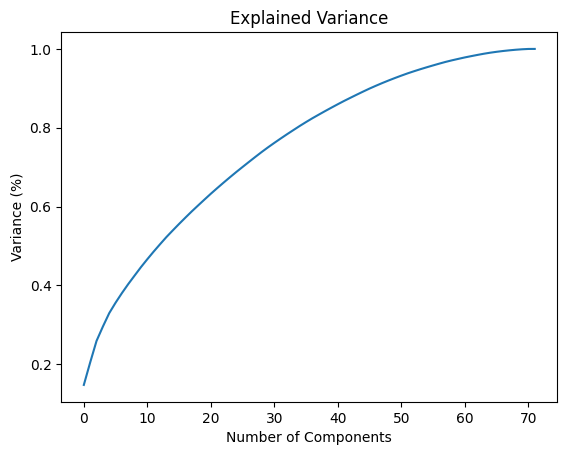

In [ ]:

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [ ]:
np.where(np.cumsum(pca.explained_variance_ratio_) > 0.95)

(array([54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
        71]),)

In [ ]:
pca = PCA(n_components=54)
new_data = pca.fit_transform(x)
# This will be the new data fed to the algorithm.
# Number of columns
num_components = 54

# Column names pattern
column_names = [f'principal component {i}' for i in range(1, num_components + 1)]

# Create DataFrame
principal_Df = pd.DataFrame(data=new_data, columns=column_names)


From the diagram and code above, it can be seen that 46 principal components explain almost 90% of the variance in data and 54 principal components explain around 95% of the variance in data.

So, instead of giving all the columns as input, we’d only feed these 46 or 54 principal components of the data to the machine learning algorithm and we’d obtain a similar result.

In [ ]:
principal_Df.shape

(1460, 54)

# 6. Model Training

In [ ]:
from sklearn.model_selection import train_test_split  # Import from the correct module
x_train,x_test,y_train,y_test=train_test_split(principal_Df,y,test_size=0.2,random_state=42)

### 6.1. Model Evaluation

In [ ]:
# Importing Libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import numpy as np
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,cross_val_score

6.1.1. Linear Regression

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred_test=lr.predict(x_test)
y_pred_train= lr.predict(x_train)

In [ ]:
print('The performance evaluation of Linear Regression is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test,y_pred_test))
print('Mean absolute error: ',mean_absolute_error(y_test, y_pred_test))
print('Test R2 score: ',r2_score(y_test, y_pred_test))

print('Train R2 score: ',r2_score(y_train,y_pred_train))

The performance evaluation of Linear Regression is below:  

Mean squared error:  1508217793.2530801
Mean absolute error:  23375.413107539694
Test R2 score:  0.8033697977747186
Train R2 score:  0.8415938406288218


6.1.2. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=50,max_depth=5)
model.fit(x_train , y_train)

DecisionTreeRegressor(max_depth=5, random_state=50)

In [ ]:
y_pred_test_DT = model.predict(x_test)
y_pred_train_DT = model.predict(x_train)

In [ ]:
dt_train_r2=r2_score(y_train, model.predict(x_train))*100
dt_test_r2 =r2_score(y_test, model.predict(x_test))*100
print('The performance evaluation of Decision Tree Regression is below: ', '\n')
print(f'R² score for train : {dt_train_r2}')
print(f'R² score for test: {dt_test_r2}')

The performance evaluation of Decision Tree Regression is below:  

R² score for train : 88.18933775506318
R² score for test: 79.19796344104016


6.1.3. Support Vector Machine

In [ ]:
svm=SVR(kernel='linear',C=150)
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)

In [ ]:
svm_train_r2=r2_score(y_train, model.predict(x_train))*100
svm_test_r2 =r2_score(y_test, model.predict(x_test))*100
print(f'R² score for train : {svm_train_r2}')
print(f'R² score for test: {svm_test_r2}')

R² score for train : 88.18933775506318
R² score for test: 79.19796344104016


6.1.4. Random Forest Regressor

In [ ]:
 RM=RandomForestRegressor(random_state=42)
 RM.fit(x_train,y_train)
 y_pred=RM.predict(x_test)

In [ ]:
rm_train_r2=r2_score(y_train, model.predict(x_train))*100
rm_test_r2 =r2_score(y_test, model.predict(x_test))*100
print(f'R² score for train : {rm_train_r2}')
print(f'R² score for test: {rm_test_r2}')

R² score for train : 88.18933775506318
R² score for test: 79.19796344104016


6.1.5. XGBoost Regressor

In [ ]:
XG=XGBRegressor(random_state=42,n_estimators=100)
XG.fit(x_train,y_train)
y_pred=XG.predict(x_test)

In [ ]:
r2_score(y_test,y_pred)

0.8812379240989685

In [ ]:
xg_train_r2=r2_score(y_train, model.predict(x_train))*100
xg_test_r2 =r2_score(y_test, model.predict(x_test))*100
print(f'R² score for train : {xg_train_r2}')
print(f'R² score for test: {xg_test_r2}')

R² score for train : 88.18933775506318
R² score for test: 79.19796344104016


6.1.6. Bagging Regressor

In [ ]:
Bg=BaggingRegressor(random_state=42)
Bg.fit(x_train,y_train)
y_pred=Bg.predict(x_test)

In [ ]:
r2_score(y_test,y_pred)

0.8658125986787082

In [ ]:
bg_train_r2=r2_score(y_train, model.predict(x_train))*100
bg_test_r2 =r2_score(y_test, model.predict(x_test))*100
print(f'R² score for train : {bg_train_r2}')
print(f'R² score for test: {bg_test_r2}')

R² score for train : 88.18933775506318
R² score for test: 79.19796344104016


6.1.7 Gradient Boosting Regressor

In [ ]:
GB=GradientBoostingRegressor(random_state=42)
GB.fit(x_train,y_train)
y_pred=GB.predict(x_test)

In [ ]:
gb_train_r2=r2_score(y_train, model.predict(x_train))*100
gb_test_r2 =r2_score(y_test, model.predict(x_test))*100
print(f'R² score for train : {gb_train_r2}')
print(f'R² score for test: {gb_test_r2}')

R² score for train : 88.18933775506318
R² score for test: 79.19796344104016


6.1.8. LightGBM Regressor

In [ ]:
LG=LGBMRegressor(random_state=42)
LG.fit(x_train,y_train)
y_pred=LG.predict(x_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001698 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13770
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 54
[LightGBM] [Info] Start training from score 181441.541952


In [ ]:
lg_train_r2=r2_score(y_train, model.predict(x_train))*100
lg_test_r2 =r2_score(y_test, model.predict(x_test))*100
print(f'R² score for train : {lg_train_r2}')
print(f'R² score for test: {lg_test_r2}')

R² score for train : 88.18933775506318
R² score for test: 79.19796344104016


# 6.2. Hyperparameter Tuning

6.2.1. LGBM Model Tuning

In [ ]:
 param_dist = {
    'num_leaves': [31, 50, 100, 150],
    'max_depth': [-1, 10, 20, 30, 40],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300, 500],
    'min_child_samples': [20, 30, 40, 50],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.3, 0.5],
    'reg_lambda': [0, 0.1, 0.3, 0.5]
 }
 random_search = RandomizedSearchCV(estimator=LG, param_distributions=param_dist)
 random_search.fit(x_train, y_train)
 best_params_random = random_search.best_params_
 print(f"Best hyperparameters : {best_params_random}")

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

6.2.2. Retraining the Model

In [ ]:
 LG_best=LGBMRegressor(random_state=42,subsample= 0.6, reg_lambda= 0.5, reg_alpha= 0.3,
 n_estimators= 200, min_child_samples= 30, max_depth= 20, learning_rate= 0.05,
 num_leaves= 31,
 colsample_bytree= 0.7)
 LG_best.fit(x_train,y_train)
 y_LGBM=LG_best.predict(x_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001246 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13770
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 54
[LightGBM] [Info] Start training from score 181441.541952
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

In [ ]:
hlg_train_r2=r2_score(y_train, model.predict(x_train))*100
hlg_test_r2 =r2_score(y_test, model.predict(x_test))*100
print(f'R² score for train : {hlg_train_r2}')
print(f'R² score for test: {hlg_test_r2}')

R² score for train : 88.18933775506318
R² score for test: 79.19796344104016


6.2.3. Bagging Model Tuning

In [ ]:
 param_dist = {
    'n_estimators': [10, 50, 100, 200, 300],
    'max_samples': [0.5, 0.6, 0.7, 0.8, 1.0],
    'max_features': [0.5, 0.6, 0.7, 0.8, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
 }
random_search = RandomizedSearchCV(estimator=Bg,param_distributions=param_dist)
random_search.fit(x_train, y_train)
best_params_random = random_search.best_params_
print(f"Best hyperparameters : {best_params_random}")
random_search.fit(x_train, y_train)
best_params_random = random_search.best_params_
print(f"Best hyperparameters : {best_params_random}")

Best hyperparameters : {'n_estimators': 200, 'max_samples': 0.6, 'max_features': 1.0, 'bootstrap_features': False, 'bootstrap': False}
Best hyperparameters : {'n_estimators': 100, 'max_samples': 0.8, 'max_features': 1.0, 'bootstrap_features': False, 'bootstrap': True}


In [ ]:
# Retraining Model

In [ ]:
 Bg=BaggingRegressor(random_state=42,n_estimators= 200,max_samples=0.6,max_features=1.0,bootstrap=False,bootstrap_features=False)
 Bg.fit(x_train,y_train)
 y_pred=Bg.predict(x_test)

In [ ]:
 r2_score(y_test,y_pred)

0.8729684743610662

In [ ]:
# GB Model Tuning
param_dist =  {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}
# Make sure this line is indented at the same level as the 'param_dist =' line
random_search = RandomizedSearchCV(estimator=GB, param_distributions=param_dist)
random_search.fit(x_train, y_train)
best_params_random = random_search.best_params_
print(f"Best hyperparameters : {best_params_random}")

Best hyperparameters : {'subsample': 0.9, 'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.1}


In [ ]:
GB = random_search.best_estimator_
y_pred_gb1 = GB.predict(x_test)
r2score = r2_score(y_test, y_pred_gb1)
print(f"R2 Score : {r2score}")

R2 Score : 0.8223614650292047


### Model Comparison Report

This report aimed to develop and evaluate various predictive models for
estimating house prices using HousePrice dataset. I explored a variety of
regression models, including Linear Regression, Decision Tree, Random
Forest, Gradient Boosting, XGBoost, LGBM,Support Vector Regression (SVR),
and Lasso Regression

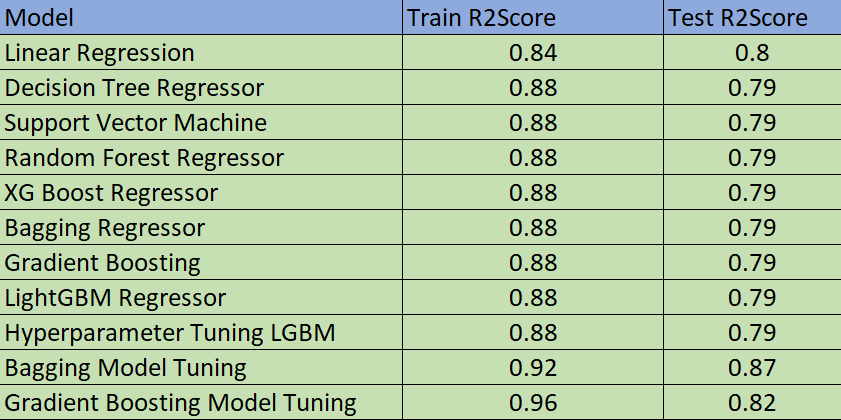